# **Installs**

In [1]:
!pip install hcipy --upgrade --quiet

     |████████████████████████████████| 190 kB 11.7 MB/s 
     |████████████████████████████████| 402 kB 86.0 MB/s 
     |████████████████████████████████| 212 kB 81.9 MB/s 
     |████████████████████████████████| 191 kB 81.1 MB/s 
     |████████████████████████████████| 68 kB 6.8 MB/s 


In [2]:
!pip install --force-reinstall jsonschema==3.2.0 --quiet

     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 29.0 MB/s 
     |████████████████████████████████| 117 kB 75.1 MB/s 
     |████████████████████████████████| 60 kB 7.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
nbclient 0.5.12 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
asdf 2.11.0 requires jsonschema>=4.0.1, but you have jsonschema 3.2.0 which is incompatible.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.
albumentation

In [3]:
!pip install git+https://github.com/rlwastro/mastcasjobs@master --quiet

In [4]:
!pip install photutils --quiet

     |████████████████████████████████| 826 kB 14.7 MB/s 


In [5]:
!pip install pyxel-sim[all] --quiet

     |████████████████████████████████| 1.3 MB 15.4 MB/s 
     |████████████████████████████████| 164 kB 81.4 MB/s 
     |████████████████████████████████| 134 kB 64.9 MB/s 
     |████████████████████████████████| 8.7 MB 53.9 MB/s 
     |████████████████████████████████| 13.3 MB 65.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.5 MB 43.5 MB/s 
     |████████████████████████████████| 1.1 MB 75.9 MB/s 
     |████████████████████████████████| 144 kB 58.6 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 271 kB 61.7 MB/s 
     |████████████████████████████████| 428 kB 61.3 MB/s 
     |████████████████████████████████| 61 kB 8.7 MB/s 
     |████████████████████████████████| 341 kB 83.1 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████

Run above cells and restart runtime. Continue to run the cells below.

# **Imports**

In [25]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

import pyxel
import poppy
import yaml
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.stats import gaussian_fwhm_to_sigma, gaussian_sigma_to_fwhm
from astropy.modeling import models, fitting
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.io import fits
from astropy.convolution import Gaussian2DKernel, convolve
from astropy.table import Table

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from matplotlib import colors as col
from astropy.wcs import WCS

from photutils import aperture as aper
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAperture

from scipy.stats import norm

import os
from time import perf_counter
import json
import requests

import mastcasjobs
from hcipy import *

# get the WSID and password if not already defined
if not os.environ.get('CASJOBS_USERID'):
    os.environ['CASJOBS_USERID'] = "avinashck90"
if not os.environ.get('CASJOBS_PW'):
    os.environ['CASJOBS_PW'] = "INSIST369"

sb.set_style('dark')
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(10,10)

# **GitHub**

In [2]:
!git clone https://github.com/Jack3690/INSIST

Cloning into 'INSIST'...
remote: Enumerating objects: 985, done.
remote: Counting objects: 100% (610/610), done.
remote: Compressing objects: 100% (606/606), done.
remote: Total 985 (delta 351), reused 4 (delta 2), pack-reused 375
Receiving objects: 100% (985/985), 110.67 MiB | 4.15 MiB/s, done.
Resolving deltas: 100% (539/539), done.


In [257]:
cd /content/INSIST/data

/content/INSIST/data


# **Detector Simulator**

In [9]:
!pyxel download-examples

Done.


In [242]:
cd /content/INSIST/data

/content/INSIST/data


In [249]:
cd /content/INSIST/data/pyxel-examples

/content/INSIST/data/pyxel-examples


In [208]:
hdu1 = fits.open('tutorial/data/test.fits')
hdu2 = fits.open('tutorial/data/Pleiades_HST.fits')

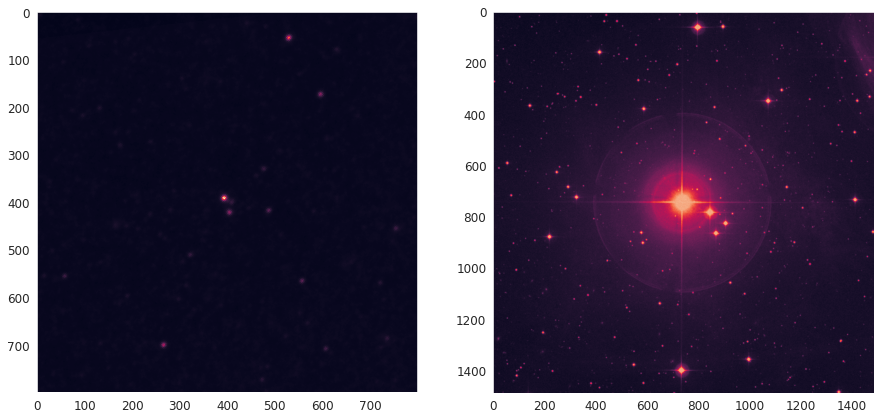

In [209]:
data1 = hdu1[0].data
data2 = hdu2[0].data
data1 = (data1/data1.max())*data2.max()
fig, ax = plt.subplots(1,2 , figsize =(15,8))
ax[0].imshow(data1)
ax[1].imshow(data2)

In [210]:
x_c = data2.shape[0]//2
y_c = data2.shape[1]//2
data2 *= 0
data2[x_c-400:x_c +400, y_c-400:y_c+400] = data1

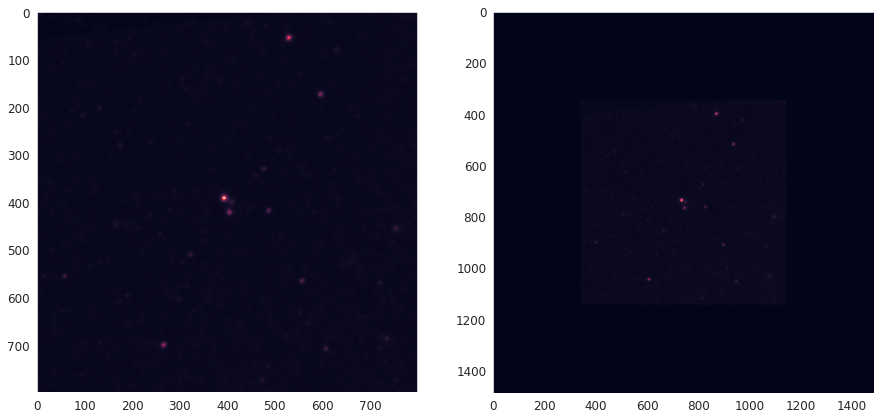

In [211]:
fig, ax = plt.subplots(1,2 , figsize =(15,8))
ax[0].imshow(data1)
ax[1].imshow(data2)

In [215]:
hdu2[0].header['DATAMIN'] = data2.min()
hdu2[0].header['DATAMAX'] = data2.max()

In [216]:
hdu_n = fits.PrimaryHDU(data,header = hdu2[0].header)
hdul = fits.HDUList(hdu_n)
hdul.writeto('tutorial/data/Pleiades.fits',overwrite = True)

In [243]:
with open("exposure_on.yaml",'r') as f:
  dat = yaml.load(f)

In [244]:
dat['pipeline']['photon_generation'][0]['arguments']['image_file'] = 'data/Pleiades.fits'

In [245]:
dat['pipeline']['optics'][0]['arguments']['wavelength'] = 0.6e-6

In [246]:
with open("exposure.yaml", 'w') as out:
  yaml.dump(dat,out)

In [247]:
config = pyxel.load("exposure.yaml")
exposure = config.exposure  # class Single
detector = config.ccd_detector  # class CCD
pipeline = config.pipeline  # class DetectionPipeline

In [248]:
pipeline.optics.optical_psf

ModelFunction(name='optical_psf', func=pyxel.models.optics.poppy.optical_psf, arguments=Arguments({'fov_arcsec': 10, 'optical_system': [{'item': 'CircularAperture', 'radius': 1}, {'item': 'SecondaryObscuration', 'n_supports': 4, 'secondary_radius': 0.36, 'support_width': 0.025}], 'pixelscale': 0.1, 'wavelength': 6e-07}), enabled=True)

In [250]:
cd tutorial

/content/INSIST/data/pyxel-examples/tutorial


In [251]:
result = pyxel.exposure_mode(exposure=exposure, detector=detector, pipeline=pipeline)

result

Cosmix:   0%|          | 0/100 [00:00<?, ? particle/s]

<xarray.Dataset>
Dimensions:       (readout_time: 1, x: 800, y: 800)
Coordinates:
  * readout_time  (readout_time) int64 1
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 792 793 794 795 796 797 798 799
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 792 793 794 795 796 797 798 799
Data variables:
    image         (readout_time, y, x) uint32 562 539 662 788 ... 889 886 843
    signal        (readout_time, y, x) float64 0.08573 0.08213 ... 0.1351 0.1285
    pixel         (readout_time, y, x) float64 285.8 273.8 336.4 ... 450.3 428.4

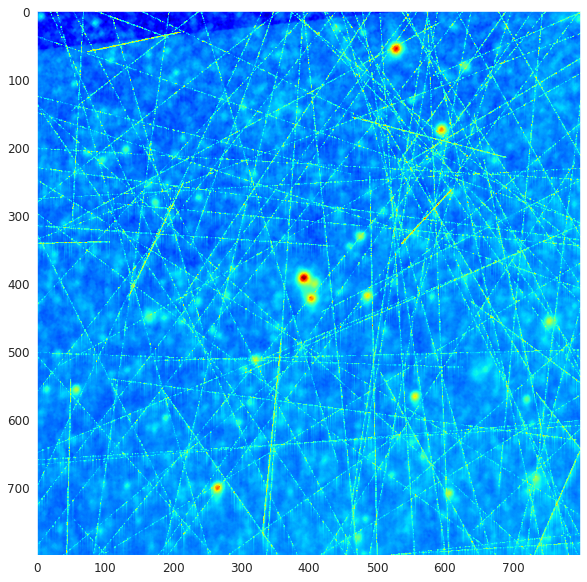

In [252]:
plt.imshow(result.pixel.data[0], cmap = 'jet', norm = col.LogNorm())

In [99]:
result.image.data

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 3, 4, ..., 1, 1, 1],
        [1, 2, 4, ..., 1, 1, 1],
        [1, 2, 4, ..., 1, 1, 1]]], dtype=uint32)

# **Single PSF Generator**

Enter FWHM of source in arcsecond : 0.1
Enter AB magnitude of the source  : 25


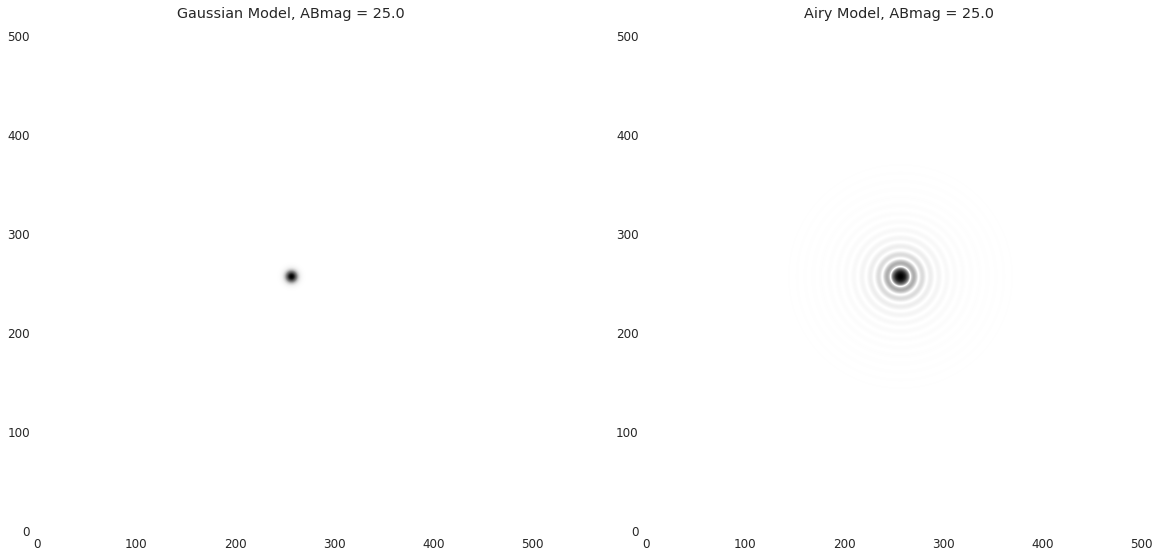

In [ ]:
fwhm_in = float(input("Enter FWHM of source in arcsecond : ") or "0.3")
ABmag   = float(input("Enter AB magnitude of the source  : ") or "0")

# Flux to AB magnitude
flux = 3631*pow(10,-ABmag/2.5)

pixel_scale = 0.01 #arcsecond

# Input FWHM to detector fwhm conversion
fwhm = fwhm_in/pixel_scale    

# fwhm to sigma conversion
sigma_psf = fwhm*gaussian_fwhm_to_sigma

# Amplitude of a gaussian for given flux and standard deviation.
amplitude_g = flux/(sigma_psf**2*2*np.pi)

amplitude_a = (flux)/(0.8569446798286412*fwhm**2)

# Number of pixels.
n_pix = 512
y, x  = np.mgrid[0:(n_pix), 0:(n_pix)]

# Modelling a 2D gaussian at the center of the image.
model_gauss = models.Gaussian2D(amplitude_g, len(x)//2, len(x)//2, sigma_psf, sigma_psf)

# Modelling a Airy Disk of same amplitude.
model_airy = models.AiryDisk2D(amplitude_a, len(x)//2, len(x)//2, fwhm)

image_g = model_gauss(x,y)

image_a = model_airy(x,y)

# Plot
fix, ax = plt.subplots(1,2,figsize=(20,10))

norm = ImageNormalize(stretch=LogStretch())

ax[0].imshow(np.log10(1+image_g/image_g.max()),origin='lower',cmap='Greys',vmin=1e-11)
ax[0].set_title(f'Gaussian Model, ABmag = {ABmag}')

ax[1].imshow(image_a,origin='lower',cmap='Greys',norm=norm)
ax[1].set_title(f'Airy Model, ABmag = {ABmag}');

In [ ]:
flux

3.631e-07

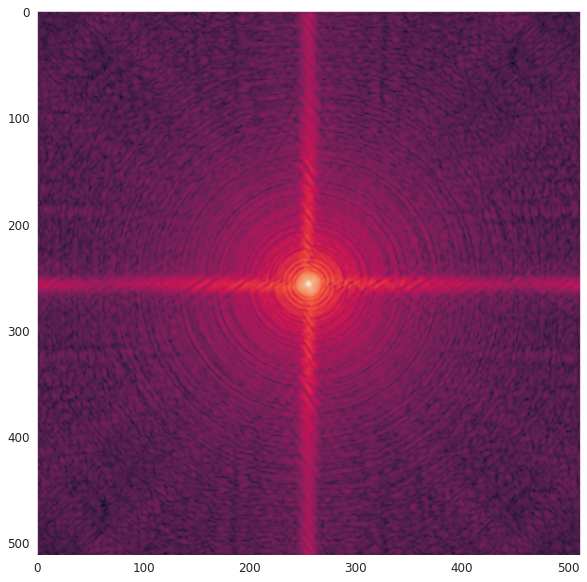

In [ ]:
on_axis_ssr = np.loadtxt('on_axis1.TXT',skiprows=18,encoding='latin-1')
plt.imshow(np.log10(on_axis_ssr/on_axis_ssr.max()))

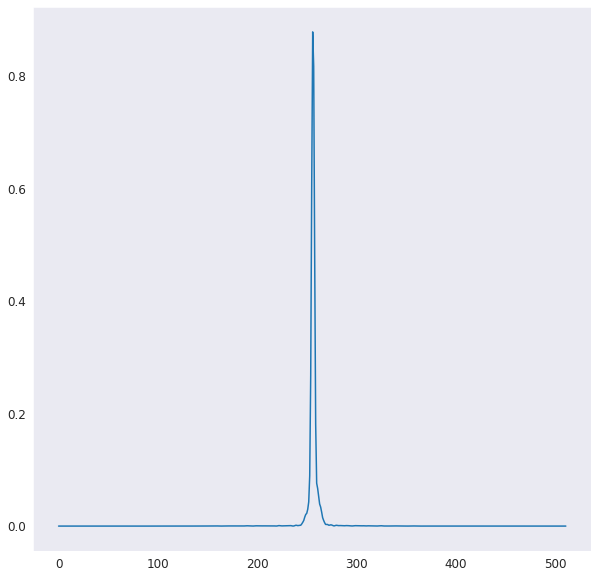

In [ ]:
plt.plot(on_axis_ssr[:,len(on_axis_ssr)//2])

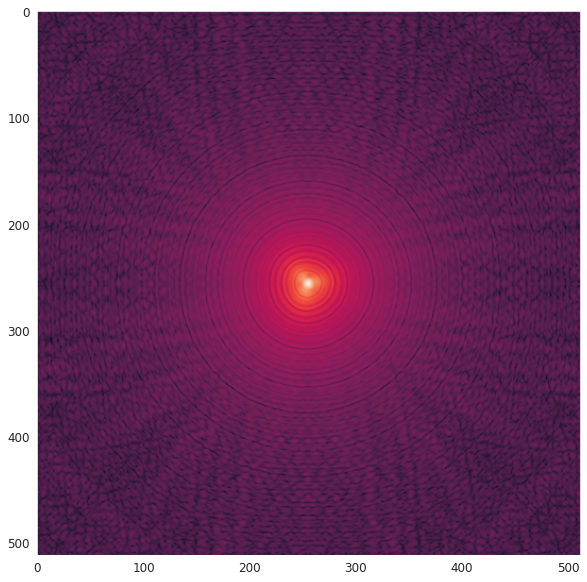

In [ ]:
off_axis_ssr = np.loadtxt('off_axis.TXT',skiprows=18,encoding='latin-1')
plt.imshow(np.log10(off_axis_ssr/off_axis_ssr.max()))

In [ ]:
image_g.sum(), flux, image_a.sum()

Airy Disk not modelled properly yet

# **PSF Generator using Source Catalog**


### **M 67 GALEX NUV**

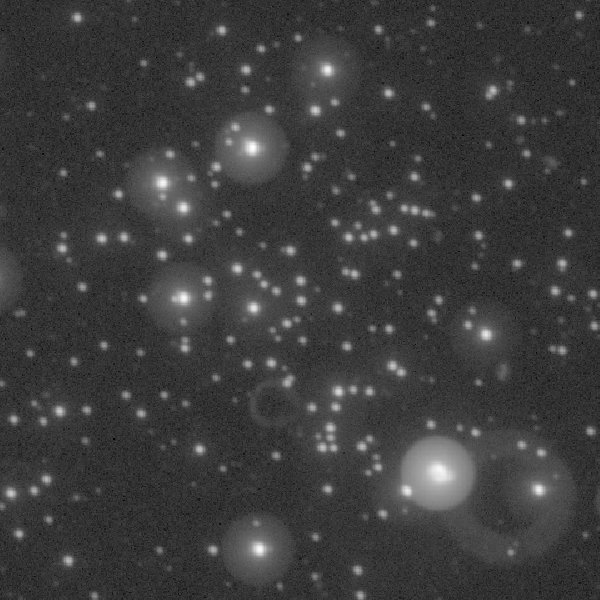

### **GALEX Data**

In [ ]:
df = pd.read_csv('M67.csv')
df = df.rename(columns={'ra':'RA','dec':'Dec'}).drop_duplicates(['RA','Dec'])
df 

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(df['RA'],df['Dec'],marker='.',color='black')
ax.set_title(f'Sky Plane Distribution | {len(df)} sources')
ax.set_xlabel('RA (Degrees)')
ax.set_ylabel('Dec (Degrees)')
ax.invert_xaxis()

In [ ]:
if df['RA'].max()+df['RA'].min() < 360:
  cen_ra = (df['RA'].max()+df['RA'].min())/2
else :
  cen_ra = (df['RA'].max()+df['RA'].min()-360)/2

cen_dec = (df['Dec'].max()+df['Dec'].min())/2

### **Creating WCS object**

In [ ]:
n_pix_main = 8000
n_pix_sub = 200
pixel_scale = 0.1 #arcsecond

w = wcs.WCS(naxis=2)
w.wcs.crpix = [n_pix_main//2,n_pix_main//2]
w.wcs.cdelt = np.array([-pixel_scale/3600, pixel_scale/3600])
w.wcs.crval = [cen_ra, cen_dec]
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]

## **RA Dec cut based of FoV**

In [ ]:
field_ra_min  = cen_ra  - 0.5*n_pix_main*pixel_scale/3600 + 0.5*n_pix_sub*pixel_scale/3600
field_ra_max  = cen_ra  + 0.5*n_pix_main*pixel_scale/3600 - 0.5*n_pix_sub*pixel_scale/3600
field_dec_min = cen_dec - 0.5*n_pix_main*pixel_scale/3600 + 0.5*n_pix_sub*pixel_scale/3600
field_dec_max = cen_dec + 0.5*n_pix_main*pixel_scale/3600 - 0.5*n_pix_sub*pixel_scale/3600

df_field = df[(df['RA']>field_ra_min) &(df['RA']<field_ra_max) &(df['Dec']>field_dec_min) &(df['Dec']<field_dec_max)]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(df_field['RA'],df_field['Dec'],marker='.',color='black')
ax.set_title(f"Distribution on Detector | {len(df)} sources")
ax.set_xlim(field_ra_min,field_ra_max )
ax.set_ylim(field_dec_min ,field_dec_max )
ax.invert_xaxis()
ax.set_xlabel('RA (Degrees)')
ax.set_ylabel('Dec (Degrees)')

## **Adding PSF at coordinates normalized by ABmag**



In [ ]:
image_g_main= np.zeros((n_pix_main,n_pix_main))
f=[]
for i, row in df_field.iterrows():

  c= SkyCoord(row['RA'],row['Dec'],unit=u.deg)
  pix = w.world_to_array_index(c)

  fwhm_in = 1.8 # arcseconds

  ABmag = row['mag_nuv']

  flux = 3631*10**(-ABmag/2.5)
  f.append(flux)

  # Input FWHM based on pixel scale
  fwhm = fwhm_in/pixel_scale    

  sigma_psf = fwhm*gaussian_fwhm_to_sigma

  amplitude = flux/(sigma_psf**2*2*np.pi)

  # Creating 2D Gaussian
  model_gauss = models.Gaussian2D(amplitude,n_pix_sub//2 , n_pix_sub//2 , sigma_psf, sigma_psf)
  y, x  = np.mgrid[0:(n_pix_sub), 0:(n_pix_sub)]

  # Patch with generated Gaussian
  image_g_sub = model_gauss(x,y)

  # Adding the patch to the image
  image_g_main[pix[0]-n_pix_sub//2:pix[0]+n_pix_sub//2,pix[1]-n_pix_sub//2:pix[1]+n_pix_sub//2]+=image_g_sub

In [ ]:
np.array(f).sum(),image_g_main.sum()  # Checking if flux is conserved

Can simulate 2D gaussians of 21702 sources in 50s

In [ ]:
norm = ImageNormalize(stretch=LogStretch())

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(projection=w)
ax.patch.set_edgecolor('black')  

ax.patch.set_linewidth('3')  
img = ax.imshow(image_g_main,cmap='Greys',vmin = 1e-11,vmax = 5.5e-9 )
ax.set_title(f'M 67 with UVIT | FWHM = {fwhm_in} arcsecs');


# **PSF using CasJobs**

## **Query Script**

In [ ]:
def mastQuery(request, json_return=False):
    """Perform a MAST query.

    Parameters
    ----------
    request (dictionary): The MAST request json object
    
    Returns the text response or (if json_return=True) the json response
    """
    
    url = "https://mast.stsci.edu/api/v0/invoke"

    # Encoding the request as a json string
    requestString = json.dumps(request)
    
    # make the query
    r = requests.post(url, data=dict(request=requestString))
    
    # raise exception on error
    r.raise_for_status()
    
    if json_return:
        return r.json()
    else:
        return r.text


def resolve(name):
    """Get the RA and Dec for an object using the MAST name resolver
    
    Parameters
    ----------
    name (str): Name of object

    Returns RA, Dec tuple with position"""

    resolverRequest = {'service':'Mast.Name.Lookup',
                       'params':{'input':name,
                                 'format':'json'
                                },
                      }
    resolvedObject = mastQuery(resolverRequest, json_return=True)
    # The resolver returns a variety of information about the resolved object, 
    # however for our purposes all we need are the RA and Dec
    try:
        objRa = resolvedObject['resolvedCoordinate'][0]['ra']
        objDec = resolvedObject['resolvedCoordinate'][0]['decl']
    except IndexError as e:
        raise ValueError("Unknown object '{}'".format(name))
    return (objRa, objDec)

In [ ]:
class PSF_gen():
    """PSF Generator using Source catalog or CasJobs GALEX Catalog

    Parameters
    ----------
    name (string) : Catalog name or coordinates of the source

    df   (pd.DataFrame ): Pandas dataframe with source catalog

    cols (dict) : dict object with column name conversions for ra,dec,mag_nuv. Eg {'RA': 'ra','Dec' : 'dec', 'ABmag' : 'mag_nuv'}

        'ra' (degrees)

        'dec' (degrees)

        'mag_nuv' (ABmag)

    pixel_scale (float) : pixel scale of detector in the unit of arcseconds/pixels

    fwhm_in (float) : Full Width at Half Maximum of the Gaussian PSF

    n_pix_main (int) : Number of pixels along one axis in the detector. Total number of pixels in the detector is n_pix_main**2

    n_pix_sub (int) : Number of pixels along one axis in the path. Total number of pixels in the patch is n_pix_sub**2

    """
    def __init__(self,name = None, df = None, cols = None, pixel_scale=0.1,fwhm_in=0.3,n_pix_main=8000,n_pix_sub=200):   

        self.pixel_scale = pixel_scale
        self.fwhm = fwhm_in/pixel_scale
        self.n_pix_main = n_pix_main
        self.n_pix_sub = n_pix_sub

        if name is not None and df is None:
          self.name = name
          self.ra,self.dec = resolve(name)
      
          self.jobs = mastcasjobs.MastCasJobs(context="GALEX_Catalogs")
          self.query =   f"""SELECT ra,dec, mag_nuv,mag_fuv 
                              FROM
                              gcat_asc
                              WHERE
                              ra BETWEEN {self.ra} -0.1 AND {self.ra}+0.1
                              AND 
                              dec BETWEEN {self.dec}-0.1 AND {self.dec}+0.1
                          """
          self.df = self.jobs.quick(self.query, task_name="python cone search").to_pandas()
        else: 
          if cols is not None:
            self.df = df.rename(columns = cols) 
          else :
            self.df =  df
          self.ra = (self.df['ra'].max()+self.df['ra'].min())/2
          self.dec = (self.df['dec'].max()+self.df['dec'].min())/2
          self.name = f" RA : {np.round(self.ra,3)} degrees, Dec : {np.round(self.dec,3)} degrees"
        self.wcs = self.create_wcs()
        self.df_field = self.create_field()
        self.image = None
        
    def create_wcs(self):
      """
      Function for creating WCS object for given ra and dec of a field or a catalog using pixel scale and n_pix_main
      """
      w = wcs.WCS(naxis=2)
      w.wcs.crpix = [self.n_pix_main//2,self.n_pix_main//2]
      w.wcs.cdelt = np.array([self.pixel_scale/3600, self.pixel_scale/3600])
      w.wcs.crval = [self.ra, self.dec]
      w.wcs.ctype = ["RA---TAN", "DEC--TAN"]
      return w

    def create_field(self):
      """
      Function for selecting sources within a box field. The box field size depends on n_pix_main, pixel_scale and n_pix_sub
     """
      field_ra_min  = self.ra  - 0.5*self.n_pix_main*self.pixel_scale/3600 + 0.5*self.n_pix_sub*self.pixel_scale/3600
      field_ra_max  = self.ra  + 0.5*self.n_pix_main*self.pixel_scale/3600 - 0.5*self.n_pix_sub*self.pixel_scale/3600
      field_dec_min = self.dec - 0.5*self.n_pix_main*self.pixel_scale/3600 + 0.5*self.n_pix_sub*self.pixel_scale/3600
      field_dec_max = self.dec + 0.5*self.n_pix_main*self.pixel_scale/3600 - 0.5*self.n_pix_sub*self.pixel_scale/3600

      df_field = self.df[(self.df['ra']>field_ra_min) &(self.df['ra']<field_ra_max) &(self.df['dec']>field_dec_min) &(self.df['dec']<field_dec_max)]
      return df_field
    
    def show_field(self,figsize=(10,10)):
      """
      Function for creating a scatter plot of sources within the FoV
      
      Returns
      -------
      fig, ax
      """
        
      fig, ax = plt.subplots(1,1,figsize=figsize)
      ax.scatter(self.df_field['ra'],self.df_field['dec'],marker='.',color='black')
      ax.set_title(f" Requested Center : {self.name} \n FoV : {np.round(self.pixel_scale*self.n_pix_main/3600,3)} degrees | {len(self.df_field)} sources")
      ax.invert_xaxis()
      ax.set_xlabel('RA (Degrees)')
      ax.set_ylabel('Dec (Degrees)')
      return fig,ax
      
    def generate_psf(self):
      """
      This function creates PSFs based on ABmag and FWHM which  on a small patch (2D array) of size n_pix_sub*n_pix_sub. 
      The patch with the PSF is then added to the image array of size n_pix_main*n_pix_sub using wcs object.
      """
      n_pix_sub = self.n_pix_sub
      image_g_main = np.zeros((self.n_pix_main,self.n_pix_main))
      f=[]
      for i, row in self.df_field.iterrows():
          c = SkyCoord(row['ra'],row['dec'],unit=u.deg)
          pix = self.wcs.world_to_array_index(c)

          ABmag = row['mag_nuv']
          flux = 3631*10**(-ABmag/2.5)
          f.append(flux)     
          sigma_psf = self.fwhm*gaussian_fwhm_to_sigma

          amplitude = flux/(sigma_psf**2*2*np.pi)
          model_gauss = models.Gaussian2D(amplitude,n_pix_sub//2 , n_pix_sub//2 , sigma_psf, sigma_psf)
          y, x  = np.mgrid[0:(n_pix_sub), 0:(n_pix_sub)]

          image_g_sub = model_gauss(x,y)

          image_g_main[pix[0]-n_pix_sub//2:pix[0]+n_pix_sub//2,pix[1]-n_pix_sub//2:pix[1]+n_pix_sub//2]+=image_g_sub
      if np.round(np.array(f).sum(),4)!= np.round(image_g_main.sum(),4):
          print("Patch width is too small")
      self.image = image_g_main
        
    def show_image(self):
      """
      Function for plotting the simulated field with PSFs
      
      Returns
      -------
      fig, ax
      """
      if np.all(self.image) !=None:
          fig = plt.figure(figsize = (15,10))
          ax = fig.add_subplot(projection=self.wcs)
          image = self.image.astype(np.float32)
          norm = ImageNormalize(stretch=LogStretch())

          ax.imshow(image,cmap='gray',vmin = 1e-11,vmax = 5.5e-9 )  #
          ax.set_title(f'Requested center : {self.name}\n Pixel Scale : {self.pixel_scale} | FWHM = {self.fwhm*self.pixel_scale} arcsecs')
          ax.invert_xaxis()
          return fig,ax
      else:
          print("Generate PSF")
    def writeto(self,name):
      """
      Function for downloading a fits file of simulated field
      """
      if np.all(self.image) !=None:
          hdu = fits.PrimaryHDU(self.image)
          hdu.wcs= self.wcs
          hdul = fits.HDUList([hdu])
          hdul.writeto(f'{name}.fits')
      else:
          print("Generate PSF")


## **Query**

In [ ]:
#df = pd.read_csv('M67.csv')

In [ ]:
name = input("Source name (Eg. M 67, 06h 03m 20s 42 18 00) : ") or "M 67"
pixel_scale = float(input("Pixel scale (arcseconds/pixel) : ") or "0.1")
fwhm_in = float(input("FWHM in arcseconds : " )or "0.3")

In [ ]:
psf = PSF_gen(name, pixel_scale = pixel_scale, fwhm_in =fwhm_in)
psf.generate_psf()
psf.show_field()

In [ ]:
psf.show_image()

# **HCIPy**

## **Circular Aperture with obstruction**

**INSIST** 

Primary      : 1     m

Secondary    : 0.36  m

Spider Width : 0.025 m

$F_{eff}$    : 20    m

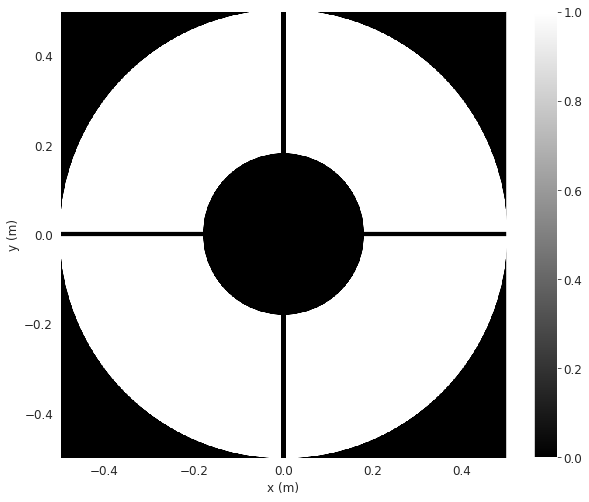

In [ ]:
pupil_diameter         = 1.0 # m
effective_focal_length = 20 # m
secondary_ratio        = 0.36
spider_width           = 0.01

pupil_grid = make_pupil_grid(1024, diameter = pupil_diameter)

aperture        = make_obstructed_circular_aperture(pupil_diameter, secondary_ratio, num_spiders=4, spider_width = spider_width )
telescope_pupil = evaluate_supersampled(aperture , pupil_grid  ,8)

im = imshow_field(telescope_pupil, cmap='gray')
plt.colorbar(shrink=0.82)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [ ]:
flux = 1

In [ ]:
focal_total = 0

for wavelength in np.linspace(150,300,10)*1e-9:

  amplitude = (flux*wavelength)**0.5    # Empirical Intensity scaling 

  wavefront = Wavefront(amplitude*telescope_pupil,wavelength)

  focal_grid = make_focal_grid(q=4, num_airy=128,pupil_diameter=pupil_diameter, focal_length=effective_focal_length, reference_wavelength=wavelength)

  prop = FraunhoferPropagator( pupil_grid, focal_grid, focal_length=effective_focal_length)
  
  focal_image = prop.forward(wavefront)
  focal_total += focal_image.intensity.shaped

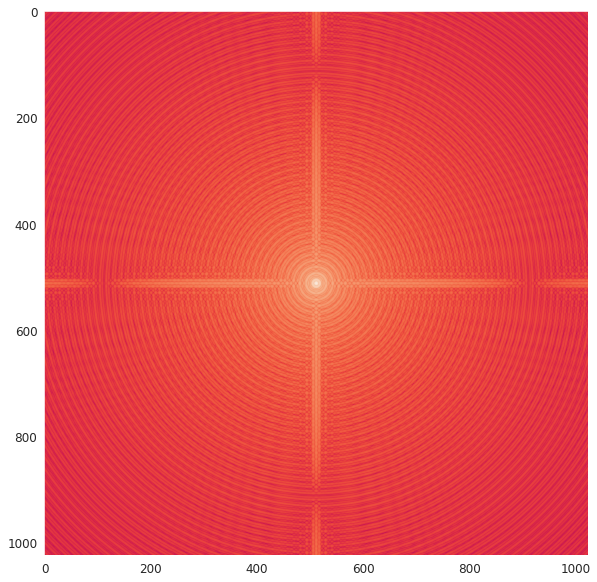

In [ ]:
plt.imshow(focal_total,norm = col.LogNorm())

In [ ]:
off_axis = np.array(focal_total/10)
off_axis.sum()

121081.30026486808

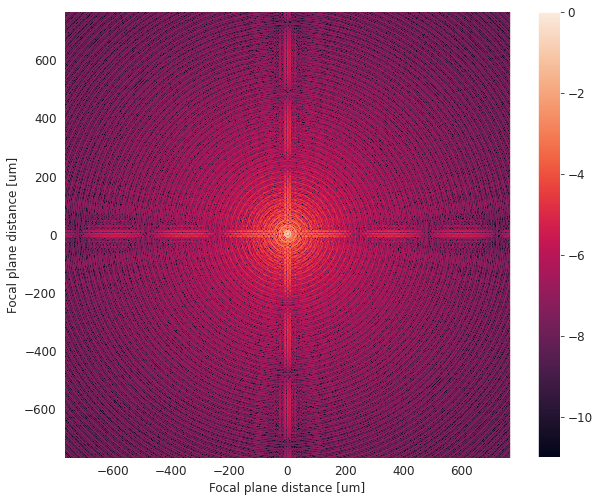

In [ ]:
img = imshow_field(np.log10(focal_image.intensity/focal_image.intensity.max()), vmin=-11, grid_units=1e-6)
plt.xlabel('Focal plane distance [um]')
plt.ylabel('Focal plane distance [um]')
plt.colorbar(shrink=0.82)
plt.show()

In [ ]:
focal_total.shape

(1024, 1024)

In [ ]:
1200/1024

1.171875

In [ ]:
plt.plot(focal_image.intensity.shaped[:,150])

In [ ]:
plt.imshow(focal_image.intensity.shaped,vmin=1e-12,vmax=1e-5)

## **Aperture Photometry for On axis and Off-axis**

### **Circular Aperture**

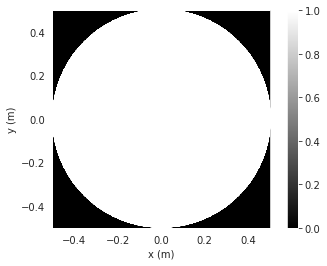

In [ ]:
pupil_diameter           = 1.0 # m

effective_focal_length   = 20 # m

pupil_grid               = make_pupil_grid(1024, diameter = pupil_diameter)

aperture                 = circular_aperture(pupil_diameter)

telescope_pupil_off_axis = evaluate_supersampled(aperture , pupil_grid  ,8)

im = imshow_field(telescope_pupil_off_axis, cmap='gray')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [ ]:
flux = 1

In [ ]:
focal_total = 0

for wavelength in np.linspace(150,300,10)*1e-9:

  amplitude = (flux*wavelength)**0.5
  wavefront = Wavefront(amplitude*telescope_pupil_off_axis,wavelength)
  focal_grid = make_focal_grid(q = 6, num_airy= 4*42.68,pupil_diameter=pupil_diameter, focal_length=effective_focal_length, reference_wavelength=wavelength)
  prop = FraunhoferPropagator( pupil_grid, focal_grid, focal_length=effective_focal_length)
  focal_image = prop.forward(wavefront)
  focal_total += focal_image.intensity.shaped

In [ ]:
(focal_grid.separated_coords[0].max() - focal_grid.separated_coords[0].min())/(focal_total.shape[0]*1e-6)

0.9995117187500001

In [ ]:
off_axis = np.array(focal_total/10)
off_axis = off_axis/off_axis.sum()
off_axis.sum(), off_axis.shape

(0.9999999999999994, (2048, 2048))

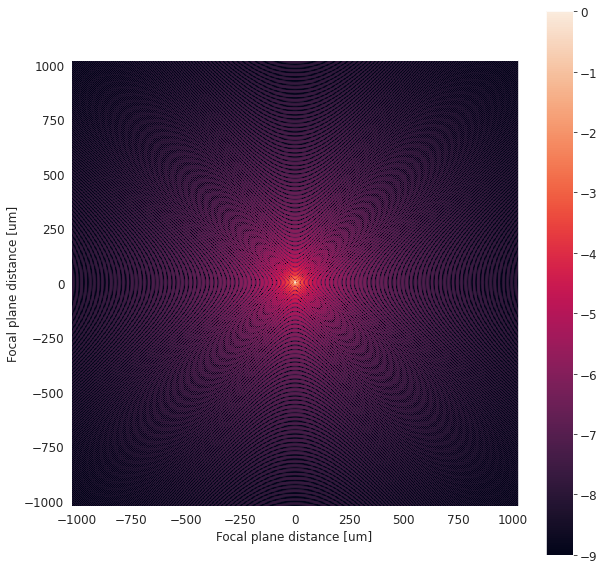

In [ ]:
img = imshow_field(np.log10(focal_image.intensity/focal_image.intensity.max()), vmin=-9, grid_units=1e-6)
plt.xlabel('Focal plane distance [um]')
plt.ylabel('Focal plane distance [um]')
plt.colorbar()
plt.show()

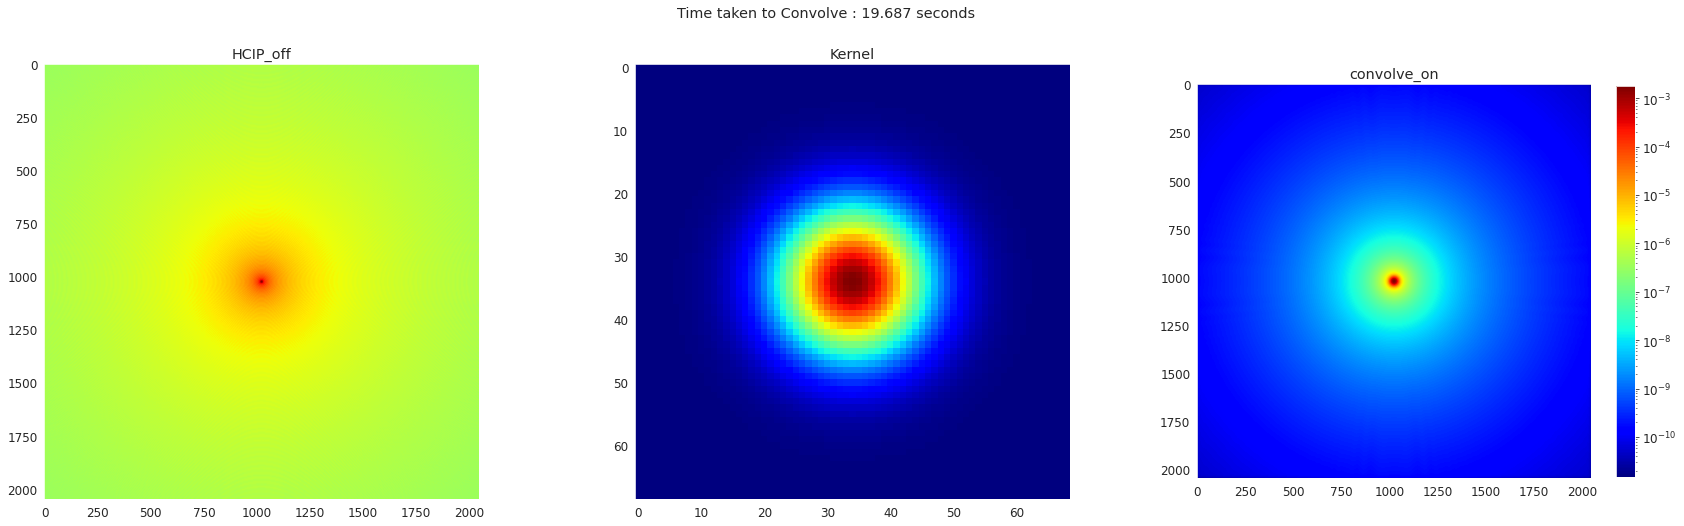

In [ ]:
fwhm_in     = 0.2  # arcsecs
pixel_scale = 0.01  # arcseconds/pixels
FWHM        = fwhm_in/pixel_scale
sigma       = FWHM*gaussian_fwhm_to_sigma
sigma

kernel = Gaussian2DKernel(sigma,sigma,x_size=69,y_size=69)
kernel.normalize()

fig, ax = plt.subplots(1,3, figsize = (30,8))
ax[0].set_title("HCIP_off")
ax[0].imshow(off_axis, cmap="jet",norm=col.LogNorm())
start = perf_counter()
astropy_conv_off =  convolve(off_axis, kernel) 


stop  = perf_counter()- start

ax[1].set_title("Kernel")
ax[1].imshow(kernel, cmap="jet")

ax[2].set_title("convolve_on")
im_on = ax[2].imshow(astropy_conv_off, cmap="jet",norm=col.LogNorm())
plt.colorbar(im_on,shrink=0.9)
fig.suptitle(f"Time taken to Convolve : {np.round(stop,4)} seconds");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


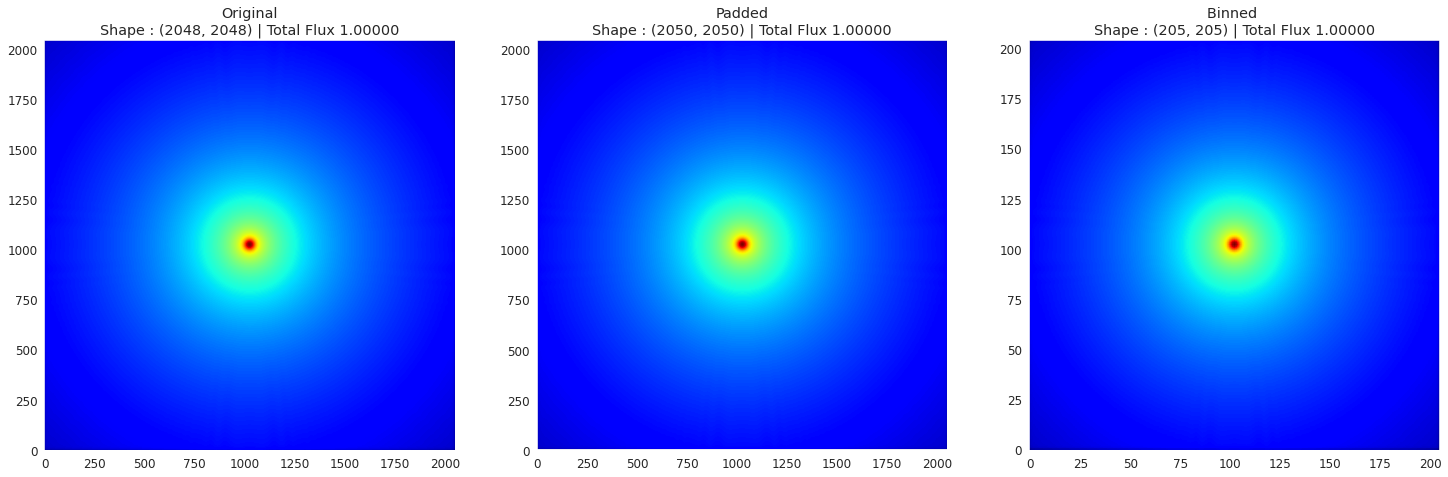

In [ ]:
Flux = astropy_conv_off    #Off_PSF
Flux_p = np.pad(Flux,((2,0),(0,2)),mode='constant')
Flux_b_off = Flux_p.reshape(205, 10, 205,10).sum(axis=(1,3))

fig, ax = plt.subplots(1,3,figsize=(25,10))

ax[0].imshow(np.log10(Flux/Flux.max()),origin = 'lower',cmap='jet')
ax[0].set_title('Original\nShape : {shape} | Total Flux {number:.{digits}f}'.format(shape = Flux.shape,number=Flux.sum(), digits=5))

ax[1].imshow(np.log10(Flux_p/Flux_p.max()),origin = 'lower',cmap='jet')
ax[1].set_title('Padded\nShape : {shape} | Total Flux {number:.{digits}f}'.format(shape = Flux_p.shape,number=Flux_p.sum(), digits=5))

ax[2].imshow(np.log10(Flux_b_off/Flux_b_off.max()),origin = 'lower',cmap='jet')
ax[2].set_title('Binned \nShape : {shape} | Total Flux {number:.{digits}f}'.format(shape = Flux_b_off.shape,number=Flux_b_off.sum(), digits=5));

In [ ]:
def fwhm_pixel_dist(data,r_frac_min=0.0,r_frac_max=0.01):
  flux_p  = data.max()
  i_p,j_p = np.where(data == flux_p)

  coords = []
  for i in range(data.shape[0]):
    for j in range(data.shape[0]):
      f = data[i,j]
      if f>= flux_p/2*(1 - r_frac_min) and f<=(1+ r_frac_max)*flux_p/2:
        break
    if f>= flux_p/2*(1 - r_frac_min) and f<=(1+ r_frac_max)*flux_p/2:
      coords.append([i,j,f])
  coords = np.array(coords)

  dist = np.sqrt( (i_p[0]- coords[:,0])**2 + (j_p[0]- coords[:,1])**2 )*2
  return dist , dist.mean()

In [ ]:
fwhm_pixel_dist(Flux_b_off,r_frac_min=0.2)

(array([2.        , 2.82842712]), 2.414213562373095)

In [ ]:
np.save('off_axis_hcipy.npy',Flux_b_off)

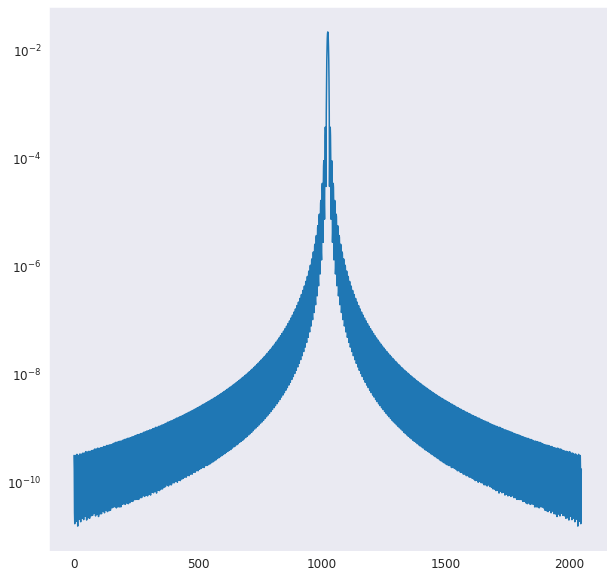

In [ ]:
plt.plot(off_axis[:,len(off_axis)//2])
plt.yscale('log')

In [ ]:
hdu = fits.PrimaryHDU(off_axis)
hdul = fits.HDUList([hdu])
hdul.writeto(f'off_axis.fits',overwrite=True)

## **Zeemax**

In [ ]:
off_axis_ssr = np.loadtxt('off_axis.TXT', skiprows=18, encoding = 'latin-1')

In [ ]:
off_axis_ssr.max()

1.0

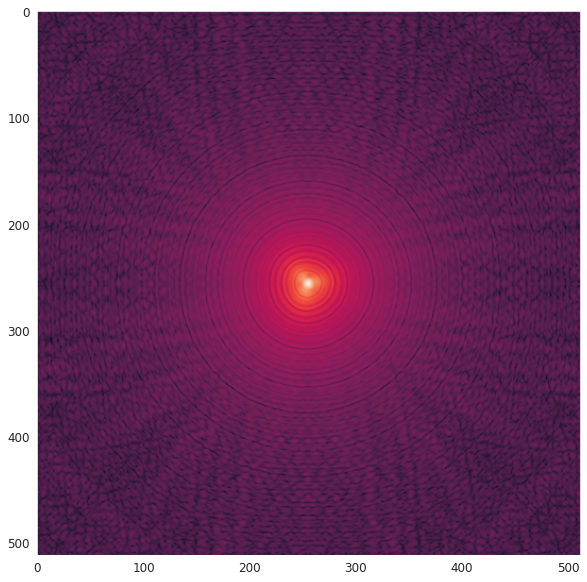

In [ ]:
plt.imshow( np.log10(off_axis_ssr))

In [ ]:
kernel = Gaussian2DKernel(8.5,8.5,x_size=69,y_size=69)
kernel.normalize()
kernel.array.sum()

1.0

In [ ]:
conv_psf = convolve(off_axis_ssr, kernel)
conv_psf.sum()

23.136866287493408

Text(0.5, 1.0, 'Convolved PSF')

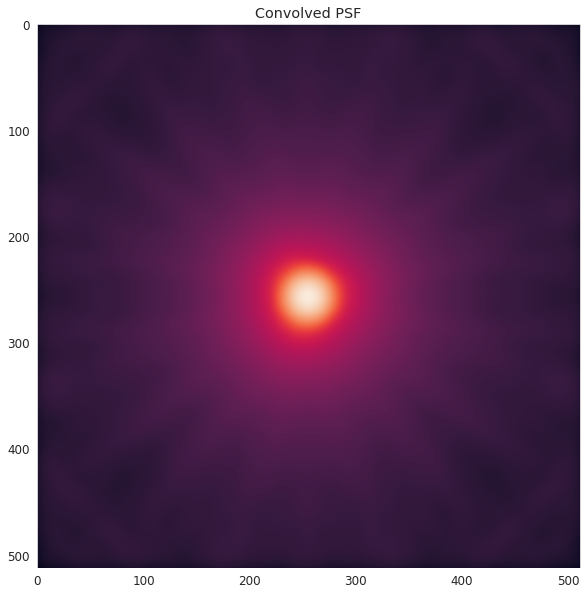

In [ ]:
plt.imshow( np.log10(conv_psf))
plt.title('Convolved PSF')

In [ ]:
flux_p  = conv_psf.max()
i_p,j_p = np.where(conv_psf == flux_p)

coords = []
for i in range(512):
  for j in range(512):
    f = conv_psf[i,j]
    if f>= flux_p/2 and f<=flux_p/2+ flux_p/2*0.01:
      break
  if f>=flux_p/2 and f<=flux_p/2+ flux_p/2*0.01:
    coords.append([i,j,f])
coords = np.array(coords)

Text(0.5, 1.0, 'Pixels coords where the amplitude is in the range max/2 and max/2 + 0.01*max/2')

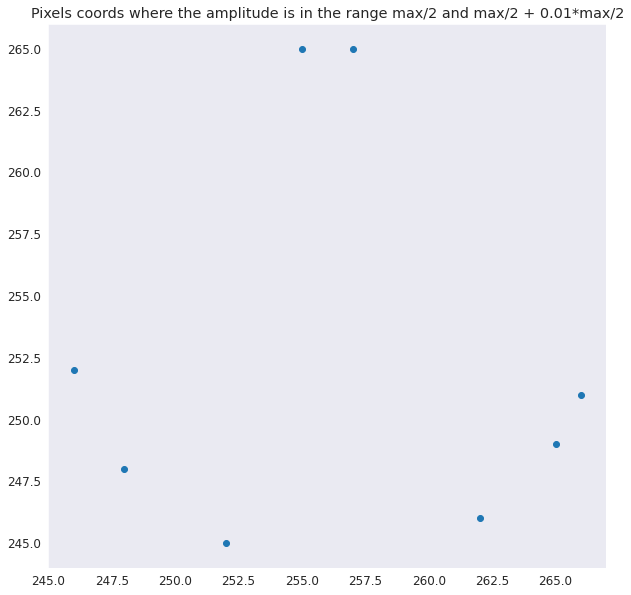

In [ ]:
plt.scatter(coords[:,0],coords[:,1])
plt.title('Pixels coords where the amplitude is in the range max/2 and max/2 + 0.01*max/2')

In [ ]:
dist = np.sqrt ( (coords[:,0]-i_p[0])**2 + (coords[:,1]-j_p[0])**2 )

In [ ]:
FWHM = np.mean(dist)*2
FWHM

21.086042611302233

## **Circular Aperture with obstruction**

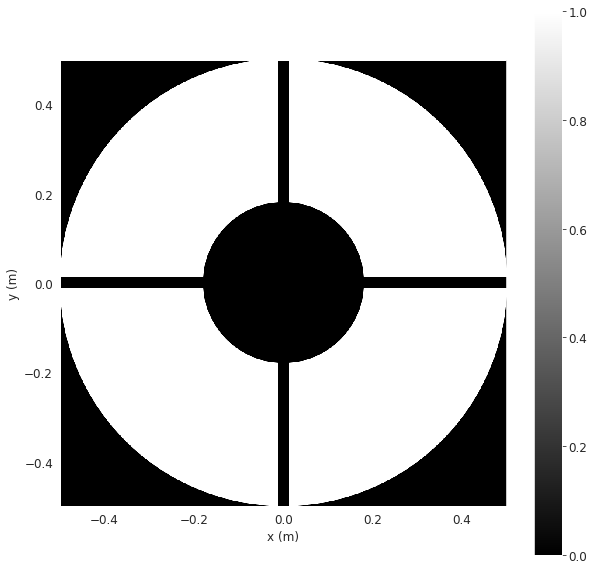

In [ ]:
pupil_diameter = 1.0 # m

effective_focal_length = 20 # m

pupil_grid = make_pupil_grid(1024, diameter = pupil_diameter)

aperture = make_obstructed_circular_aperture(pupil_diameter,0.36,num_spiders=4,spider_width= 0.025)

telescope_pupil_on_axis = evaluate_supersampled(aperture , pupil_grid  ,8)

im = imshow_field(telescope_pupil_on_axis, cmap='gray')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [ ]:
flux = 1

In [ ]:
focal_total = 0

for wavelength in np.linspace(150,300,10)*1e-9:

  amplitude = (flux*wavelength)**0.5
  wavefront = Wavefront(amplitude*telescope_pupil_on_axis,wavelength)
  focal_grid = make_focal_grid(q=6, num_airy=4*42.68,pupil_diameter=pupil_diameter, focal_length=effective_focal_length, reference_wavelength=wavelength)
  prop = FraunhoferPropagator( pupil_grid, focal_grid, focal_length=effective_focal_length)
  focal_image = prop.forward(wavefront)
  focal_total += focal_image.intensity.shaped

In [ ]:
focal_image.amplitude.shaped.shape

(1024, 1024)

In [ ]:
on_axis = np.array(focal_total/10)
on_axis = on_axis/on_axis.sum()
on_axis.sum()

0.9999999999999998

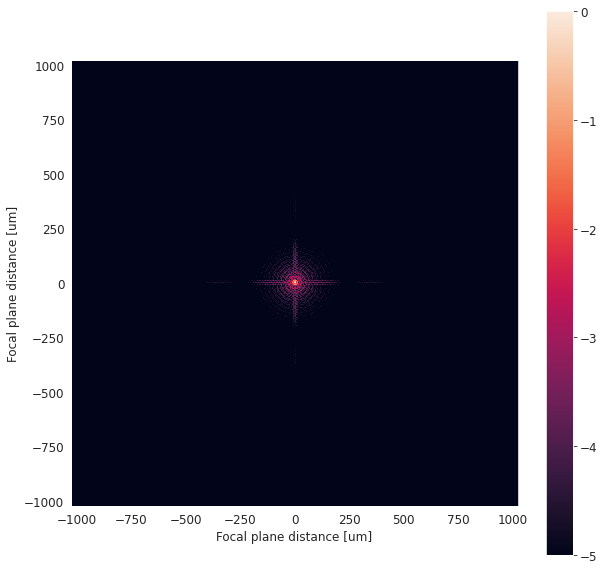

In [ ]:
img = imshow_field(np.log10(focal_image.intensity/focal_image.intensity.max()), vmin=-5, grid_units=1e-6)
plt.xlabel('Focal plane distance [um]')
plt.ylabel('Focal plane distance [um]')
plt.colorbar()
plt.show()

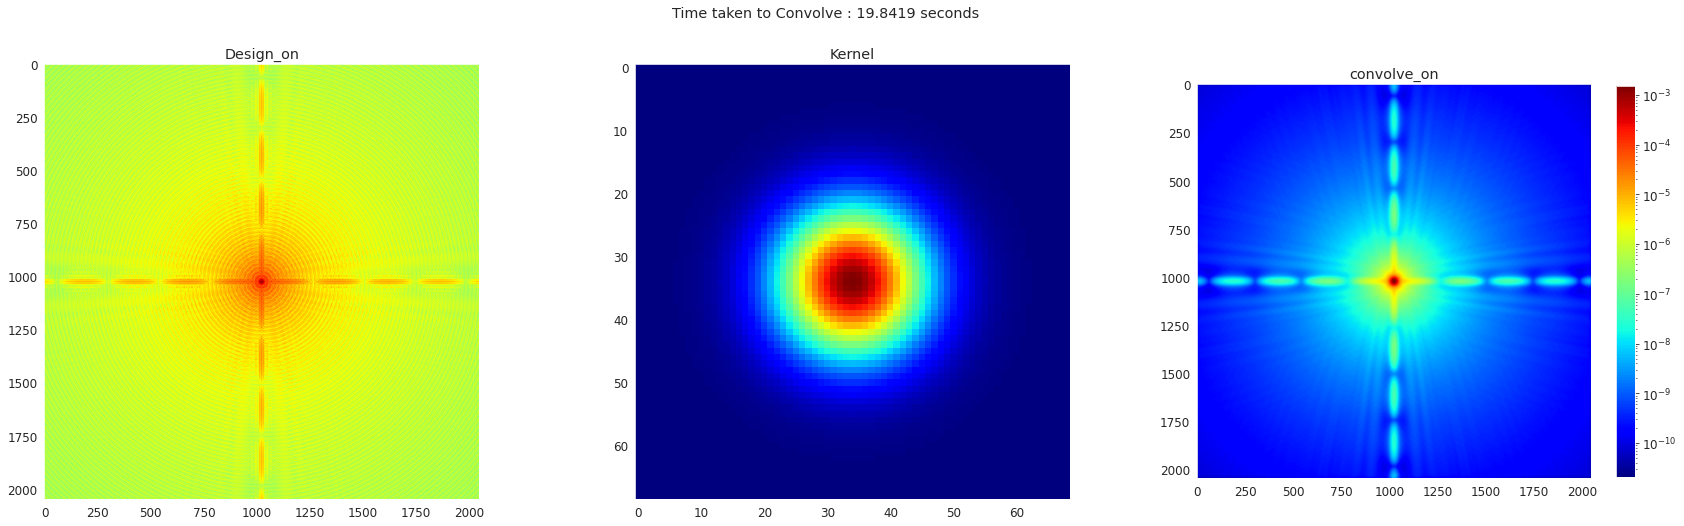

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (30,8))
ax[0].set_title("HCIPy_on")
ax[0].imshow(on_axis, cmap="jet",norm=col.LogNorm())

kernel = Gaussian2DKernel(sigma,sigma,x_size=69,y_size=69)
kernel.normalize()
start = perf_counter()
astropy_conv_on = convolve(on_axis, kernel) # Astropy convolution

stop  = perf_counter()- start

ax[1].set_title("Kernel")
ax[1].imshow(kernel, cmap="jet")

ax[2].set_title("convolve_on")
im_on = ax[2].imshow(astropy_conv_on, cmap="jet",norm=col.LogNorm())
plt.colorbar(im_on,shrink=0.9)
fig.suptitle(f"Time taken to Convolve : {np.round(stop,4)} seconds");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


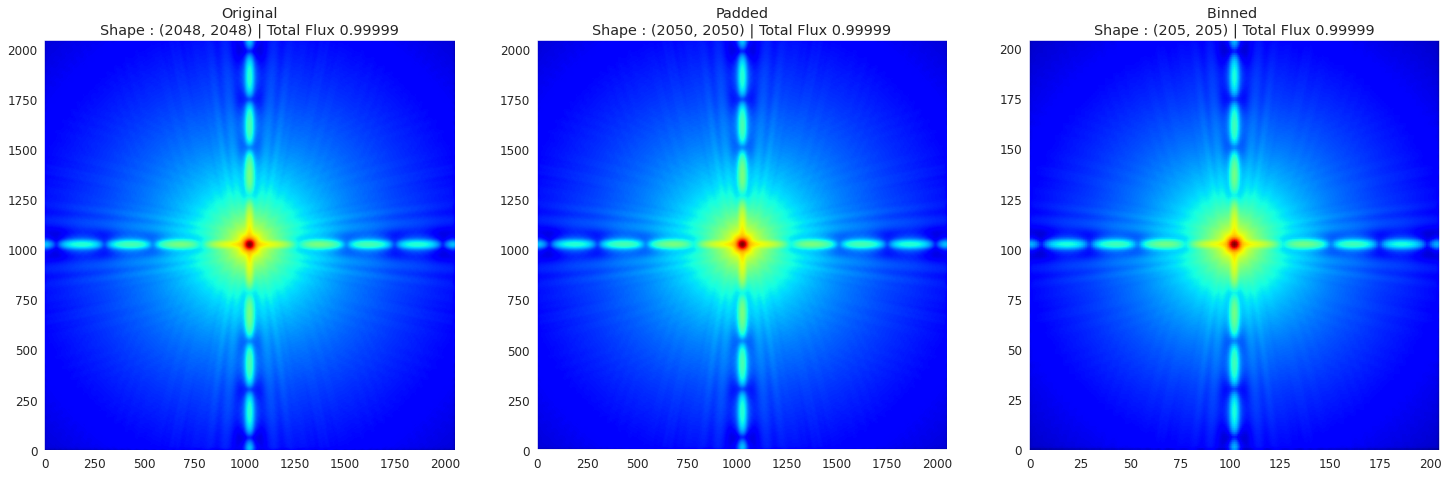

In [ ]:
Flux = astropy_conv_on
Flux_p = np.pad(Flux,((2,0), (0,2)),mode='constant')
Flux_b_on = Flux_p.reshape(205,10, 205,10).sum(axis=3).sum(axis=1)

fig, ax = plt.subplots(1,3,figsize=(25,10))

ax[0].imshow(np.log10(Flux/Flux.max()),origin = 'lower',cmap='jet')
ax[0].set_title('Original\nShape : {shape} | Total Flux {number:.{digits}f}'.format(shape = Flux.shape,number=Flux.sum(), digits=5))

ax[1].imshow(np.log10(Flux_p/Flux_p.max()),origin = 'lower',cmap='jet')
ax[1].set_title('Padded\nShape : {shape} | Total Flux {number:.{digits}f}'.format(shape = Flux_p.shape,number=Flux_p.sum(), digits=5))

ax[2].imshow(np.log10(Flux_b_on/Flux_b_on.max()),origin = 'lower',cmap='jet')
ax[2].set_title('Binned \nShape : {shape} | Total Flux {number:.{digits}f}'.format(shape = Flux_b_on.shape,number=Flux_b_on.sum(), digits=5));

In [ ]:
np.save('on_axis_hcipy.npy',Flux_b_on)

In [ ]:
plt.plot(on_axis[:,len(on_axis)//2])
plt.yscale('log')

In [ ]:
hdu = fits.PrimaryHDU(on_axis)
hdul = fits.HDUList([hdu])
hdul.writeto(f'on_axis.fits',overwrite=True)

## **Circular Aperture with New Spider**

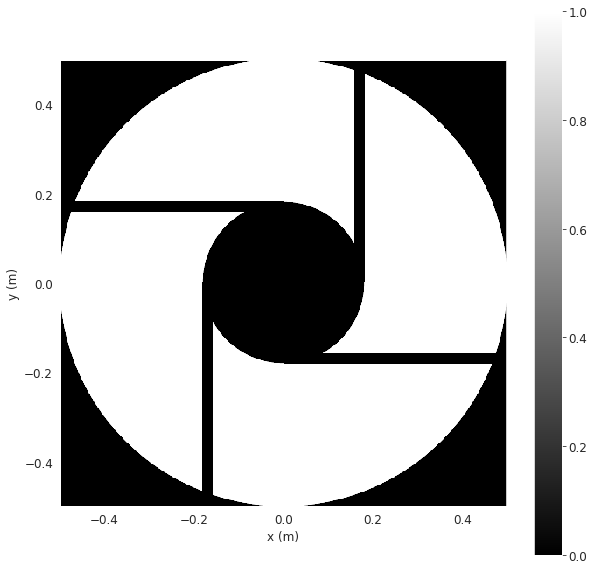

In [ ]:
pupil_diameter = 1.0 # m

effective_focal_length = 20 # m

pupil_grid = make_pupil_grid(512, diameter = pupil_diameter)

pupil_outer = circular_aperture(pupil_diameter)(pupil_grid)
pupil_inner = circular_aperture(0.36)(pupil_grid)

pupil_ring = pupil_outer - pupil_inner

aperture = make_obstructed_circular_aperture(pupil_diameter,0.36)

telescope_pupil_off_axis_v2 = evaluate_supersampled(aperture , pupil_grid  ,8)

spiders1= make_spider((0, -0.17), (0.5, -0.17), 0.025)(pupil_grid)
spiders2= make_spider((0.17, 0), (0.17, 0.5), 0.025)(pupil_grid)
spiders3= make_spider((0, 0.17), (-0.5, 0.17), 0.025)(pupil_grid)
spiders4= make_spider((-0.17, 0), (-0.17, -0.5), 0.025)(pupil_grid)

for spider in [spiders1,spiders2,spiders3,spiders4]:
  telescope_pupil_off_axis_v2*=spider*pupil_ring


im = imshow_field(telescope_pupil_off_axis_v2, cmap='gray')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [ ]:
flux = 1

In [ ]:
focal_total = 0

for wavelength in np.linspace(150,300,10)*1e-9:

  amplitude = (flux*wavelength/474986.6604404929)**0.5
  wavefront = Wavefront(amplitude*telescope_pupil_off_axis_v2,wavelength)
  focal_grid = make_focal_grid(q=8, num_airy=50,pupil_diameter=pupil_diameter, focal_length=effective_focal_length, reference_wavelength=wavelength)
  prop = FraunhoferPropagator( pupil_grid, focal_grid, focal_length=effective_focal_length)
  focal_image = prop.forward(wavefront)
  focal_total += focal_image.intensity.shaped

In [ ]:
focal_image.amplitude.shaped.shape

(800, 800)

In [ ]:
on_axis_v2 = np.array(focal_total/10)
on_axis_v2.sum()

0.9999999999999998

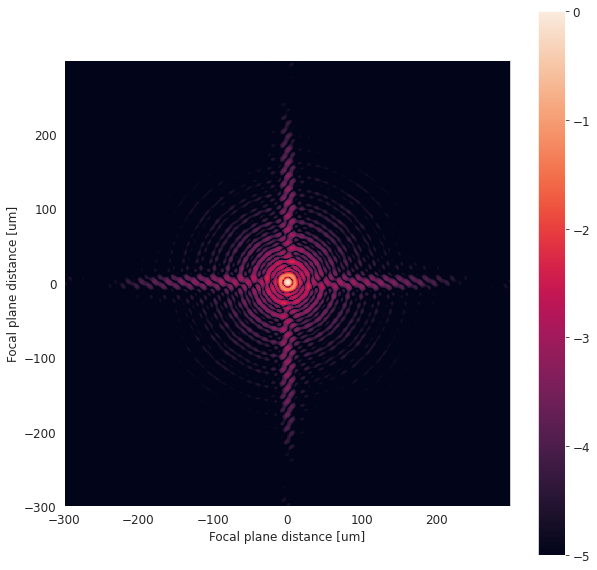

In [ ]:
img = imshow_field(np.log10(focal_image.intensity/focal_image.intensity.max()), vmin=-5, grid_units=1e-6)
plt.xlabel('Focal plane distance [um]')
plt.ylabel('Focal plane distance [um]')
plt.colorbar()
plt.show()

In [ ]:
plt.plot(on_axis_v2[:,len(on_axis_v2)//2])
plt.yscale('log')

In [ ]:
fig, ax = plt.subplots(1,3,figsize= (30,10))
ax[0].imshow(on_axis,vmin=1e-9,vmax=1e-5)
ax[0].set_title(f'On Axis | Flux : {np.round(on_axis.sum(),4)} Jy' )
ax[1].imshow(off_axis,vmin=1e-9,vmax=1e-5)
ax[1].set_title(f'Off Axis | Flux : {np.round(off_axis.sum(),4)} Jy')

resid = on_axis- off_axis 
ax[2].imshow(resid,vmin=1e-9,vmax=1e-5)
ax[2].set_title(f'Residual| Flux : {resid.sum()} Jy');

In [ ]:
fig, ax = plt.subplots(1,3,figsize= (30,10))
ax[0].plot(on_axis[:,len(on_axis)//2])
ax[0].set_title(f'On Axis | Flux : {np.round(on_axis.sum(),4)} Jy' )
ax[1].plot(off_axis[:,len(off_axis)//2])
ax[1].set_title(f'Off Axis | Flux : {np.round(off_axis.sum(),4)} Jy')

 
ax[2].plot(on_axis[:,len(on_axis)//2])
ax[2].plot(off_axis[:,len(off_axis)//2])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

In [ ]:
data = off_axis
positions = [(data.shape[0]//2, data.shape[1]//2)]
aperture = CircularAperture(positions, r=8.)
phot_table = aperture_photometry(data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  
phot_table

In [ ]:
data = on_axis
positions = [(data.shape[0]//2, data.shape[1]//2)]
aperture = CircularAperture(positions, r=8.)
phot_table = aperture_photometry(data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  
phot_table

In [ ]:
data = on_axis_v2
positions = [(data.shape[0]//2, data.shape[1]//2)]
aperture = CircularAperture(positions, r=8.)
phot_table = aperture_photometry(data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  
phot_table

# **PSF Generator with CasJobs and Zeemax**

In [253]:
def mastQuery(request, json_return=False):
    """
    Perform a MAST query.

    Parameters
    ----------
    request (dictionary): The MAST request json object
    
    Returns the text response or (if json_return=True) the json response
    """
    
    url = "https://mast.stsci.edu/api/v0/invoke"

    # Encoding the request as a json string
    requestString = json.dumps(request)
    
    # make the query
    r = requests.post(url, data=dict(request=requestString))
    
    # raise exception on error
    r.raise_for_status()
    
    if json_return:
        return r.json()
    else:
        return r.text


def resolve(name):
    """Get the RA and Dec for an object using the MAST name resolver
    
    Parameters
    ----------
    name (str): Name of object

    Returns RA, Dec tuple with position"""

    resolverRequest = {'service':'Mast.Name.Lookup',
                       'params':{'input':name,
                                 'format':'json'
                                },
                      }
    resolvedObject = mastQuery(resolverRequest, json_return=True)
    # The resolver returns a variety of information about the resolved object, 
    # however for our purposes all we need are the RA and Dec
    try:
        objRa = resolvedObject['resolvedCoordinate'][0]['ra']
        objDec = resolvedObject['resolvedCoordinate'][0]['decl']
    except IndexError as e:
        raise ValueError("Unknown object '{}'".format(name))
    return (objRa, objDec)
    

In [254]:
class PSF_gen_v2():
    """PSF Generator using Source catalog or CasJobs GALEX Catalog

    Parameters
    ----------
    name (string) : Catalog name or coordinates of the source

    df   (pd.DataFrame ): Pandas dataframe with source catalog

    cols (dict) : dict object with column name conversions for ra,dec,mag_nuv. Eg {'RA': 'ra','Dec' : 'dec', 'ABmag' : 'mag_nuv'}

        'ra' (degrees)

        'dec' (degrees)

        'mag_nuv' (ABmag)

    pixel_scale (float) : pixel scale of detector in the unit of arcseconds/pixels

    fwhm_in (float) : Full Width at Half Maximum of the Gaussian PSF

    n_pix_main (int) : Number of pixels along one axis in the detector. Total number of pixels in the detector is n_pix_main**2

    n_pix_sub (int) : Number of pixels along one axis in the path. Total number of pixels in the patch is n_pix_sub**2

    """
    def __init__(self,name = None, df = None, cols = None,exp_time = 1, n_pix_main = 800, axis = 'on',mode = 'zmax'):   

        self.pixel_scale = 0.1
        self.axis = axis
        
        self.M_sky        =  27.5
        self.M_sky_p      = self.M_sky - 2.5*np.log10(self.pixel_scale**2)

        self.exp_time     = exp_time #second
        self.RN           = 0
        self.DC           = 0

        # Background
        self.zero_mag_s_on =  self.exp_time*1.51e3*3631*np.pi*(100/2)**2*(1500/2250)*0.8**6*0.95**2*0.5*0.68*0.83

        self.zero_mag_s_off = self.exp_time*1.51e3*3631*np.pi*(100/2)**2*(1500/2250)*0.8**5*0.95**2*0.5*0.83

        if mode == 'zmax':
          if self.axis =='on':
            image =  np.load('On_PSF_Zmax.npy')
            image /= image.sum()
            self.image_g_sub = image
            F_sky_p           = self.zero_mag_s_on*pow(10,-0.4*self.M_sky_p)
            self.sky_bag_flux = F_sky_p    
            self.zero_flux    = self.zero_mag_s_on 
            
          elif self.axis=='off':
            image  = np.load('Off_PSF_Zmax.npy')
            image /= image.sum()
            self.image_g_sub  = image
            F_sky_p           = self.zero_mag_s_off*pow(10,-0.4*self.M_sky_p)
            self.sky_bag_flux = F_sky_p    
            self.zero_flux    = self.zero_mag_s_off 

        elif mode =='hcipy':
          if self.axis =='on':
            image  = np.load('on_axis_hcipy.npy')
            image /= image.sum()
            self.image_g_sub =  image
            F_sky_p           = self.zero_mag_s_on*pow(10,-0.4*self.M_sky_p)
            self.sky_bag_flux = F_sky_p    
            self.zero_flux    = self.zero_mag_s_on  

          elif self.axis=='off':
            image  = np.load('off_axis_hcipy.npy')
            image /= image.sum()
            self.image_g_sub  = image
            F_sky_p           = self.zero_mag_s_off*pow(10,-0.4*self.M_sky_p)
            self.sky_bag_flux = F_sky_p    
            self.zero_flux    = self.zero_mag_s_off 

        self.n_pix_sub  = self.image_g_sub.shape[0]
        self.n_pix_main = n_pix_main + self.n_pix_sub

        if name is not None and df is None:
          self.name        = name
          self.ra,self.dec = resolve(name)
      
          self.jobs = mastcasjobs.MastCasJobs(context="GALEX_Catalogs")
          self.query =   f"""SELECT ra,dec, mag_nuv,mag_fuv 
                              FROM
                              gcat_asc
                              WHERE
                              ra BETWEEN {self.ra} -0.1 AND {self.ra}+0.1
                              AND 
                              dec BETWEEN {self.dec}-0.1 AND {self.dec}+0.1
                          """
          self.df = self.jobs.quick(self.query, task_name="python cone search").to_pandas()

        else: 
          if cols is not None:
            self.df = df.rename(columns = cols) 
          else :
            self.df =  df
          self.ra   = (self.df['ra'].max()+self.df['ra'].min())/2
          self.dec  = (self.df['dec'].max()+self.df['dec'].min())/2
          self.name = f" RA : {np.round(self.ra,3)} degrees, Dec : {np.round(self.dec,3)} degrees"

        self.wcs      = self.create_wcs()
        self.df_field = self.create_field()
        self.image    = None
        
    def create_wcs(self):
      """
      Function for creating WCS object for given ra and dec of a field or a catalog using pixel scale and n_pix_main
      """
      w = WCS(naxis=2)
      w.wcs.crpix = [self.n_pix_main//2,self.n_pix_main//2]
      w.wcs.cdelt = np.array([-self.pixel_scale/3600, self.pixel_scale/3600])
      w.wcs.crval = [self.ra, self.dec]
      w.wcs.ctype = ["RA---TAN", "DEC--TAN"]
      return w

    def create_field(self):
      """
      Function for selecting sources within a box field. The box field size depends on n_pix_main, pixel_scale and n_pix_sub
     """
      field_ra_min  = self.ra  - 0.5*(self.n_pix_main - self.n_pix_sub)*self.pixel_scale/3600
      field_ra_max  = self.ra  + 0.5*(self.n_pix_main - self.n_pix_sub)*self.pixel_scale/3600 
      field_dec_min = self.dec - 0.5*(self.n_pix_main - self.n_pix_sub)*self.pixel_scale/3600
      field_dec_max = self.dec + 0.5*(self.n_pix_main - self.n_pix_sub)*self.pixel_scale/3600

      df_field = self.df[(self.df['ra']>field_ra_min) &(self.df['ra']<field_ra_max) &(self.df['dec']>field_dec_min) &(self.df['dec']<field_dec_max)]
      return df_field
    
    def show_field(self,figsize=(10,10)):
      """
      Function for creating a scatter plot of sources within the FoV
      
      Returns
      -------
      fig, ax
      """
        
      fig, ax = plt.subplots(1,1,figsize=figsize)
      ax.scatter(self.df_field['ra'],self.df_field['dec'],marker='.',color='black')
      ax.set_title(f" Requested Center : {self.name} \n FoV : {np.round(self.pixel_scale*self.n_pix_main/3600,3)} degrees | {len(self.df_field)} sources")
      ax.invert_xaxis()
      ax.set_xlabel('RA (Degrees)')
      ax.set_ylabel('Dec (Degrees)')
      return fig,ax
      
    def generate_psf(self):
      """
      This function creates PSFs based on ABmag and FWHM which  on a small patch (2D array) of size n_pix_sub*n_pix_sub. 
      The patch with the PSF is then added to the image array of size n_pix_main*n_pix_sub using wcs object.
      """
      n_pix_sub = self.n_pix_sub
      image_g_main = np.random.randn(self.n_pix_main,self.n_pix_main)*self.sky_bag_flux*0.01 + self.sky_bag_flux + self.RN + self.DC*self.exp_time
      image_g_sub  = self.image_g_sub
    
      self.bag = image_g_main.copy()
 
      if  self.n_pix_sub%2 ==0:
       patch_width_l = self.n_pix_sub//2
       patch_width_r = self.n_pix_sub//2

      else:
        patch_width_l = self.n_pix_sub//2 
        patch_width_r = self.n_pix_sub//2 +1

      for i, row in self.df_field.iterrows():

          c = SkyCoord(row['ra'],row['dec'],unit=u.deg)
          pix = self.wcs.world_to_array_index(c)
          ABmag = row['mag_nuv']

          flux  = self.zero_flux*10**(-ABmag/2.5)  # Photo-elec per second

          patch =  flux*image_g_sub #  np.where(flux*image_g_sub>=self.sky_bag_flux, flux*image_g_sub - self.sky_bag_flux, 0) #

          x1 = pix[0] - patch_width_l
          x2 = pix[0] + patch_width_r
          y1 = pix[1] - patch_width_l
          y2 = pix[1] + patch_width_r

          image_g_main[ x1: x2, y1:y2 ] += patch
  
      image   = image_g_main[patch_width_l:-patch_width_l,patch_width_l:-patch_width_l]

      self.n_pix_main -= self.n_pix_sub
      self.wcs = self.create_wcs()
      self.image = image
    def show_image(self):
      """
      Function for plotting the simulated field with PSFs
      
      Returns
      -------
      fig, ax
      """
      if np.all(self.image) !=None:
          fig = plt.figure(figsize = (15,10))
          ax = fig.add_subplot(projection=self.wcs)
          image = self.image.astype(np.float32)
          ax.patch.set_edgecolor('black')  
          ax.patch.set_linewidth('3') 
          ax.imshow(image,cmap='gray' , norm = col.LogNorm(),vmin = self.bag.mean() + 3*self.bag.std())  #
          ax.set_title(f'Requested center : {self.name}')
          return fig,ax
      else:
          print("Generate PSF")
    def writeto(self,name):
      """
      Function for downloading a fits file of simulated field
      """
      if np.all(self.image) !=None:
          hdu = fits.PrimaryHDU(self.image, header = self.wcs.to_header())
          hdu.wcs = self.wcs
          hdul = fits.HDUList([hdu])
          hdul.writeto(f'{name}',overwrite= True)
      else:
          print("Generate PSF")

In [255]:
name = input("Source name (Eg. M 67, 06h 03m 20s 42 18 00) : ") or "M 67"

Source name (Eg. M 67, 06h 03m 20s 42 18 00) : 03 47 29.07 +24 06 16.9


In [259]:
df = Table.read('phatm31.fit').to_pandas()
df =  df.rename(columns = {'RAJ2000':'ra','DEJ2000':'dec','F275W': 'mag_nuv'})

In [ ]:
ra      = [i*12/3600 for i in range(0,5)]  + [i*12/3600 for i in range(0,5)] + [i*12/3600 for i in range(0,5)]
dec     = [0*12/3600 for i in range(0,5)]  + [1*12/3600 for i in range(0,5)] + [2*12/3600 for i in range(0,5)]
mag_nuv = [10 + i for i in range(0,15)]
df      = pd.DataFrame(zip(ra,dec,mag_nuv), columns= ['ra', 'dec', 'mag_nuv'])

In [ ]:
ra      = [0]
dec     = [0]
mag_nuv = [0]
df      = pd.DataFrame(zip(ra,dec,mag_nuv), columns= ['ra', 'dec', 'mag_nuv'])

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f483f143e50>)

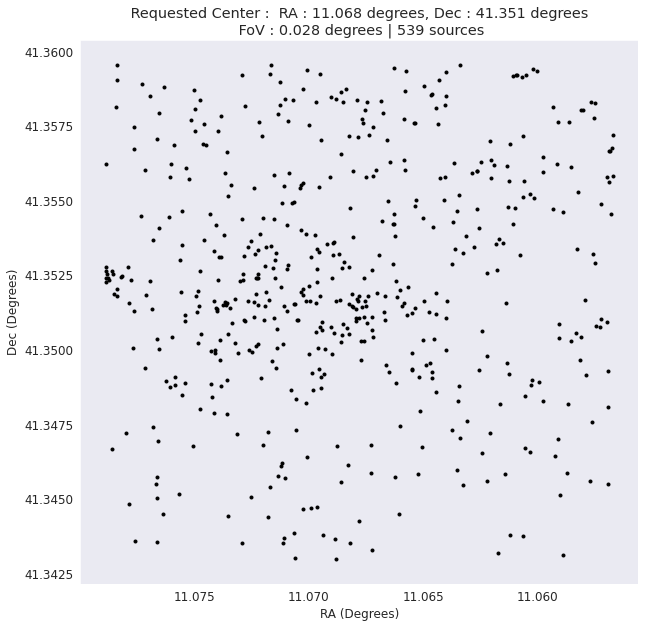

In [261]:
psf = PSF_gen_v2(df=df,axis='off',mode='hcipy')
psf.show_field()

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.WCSAxesSubplot at 0x7f483f6afd90>)

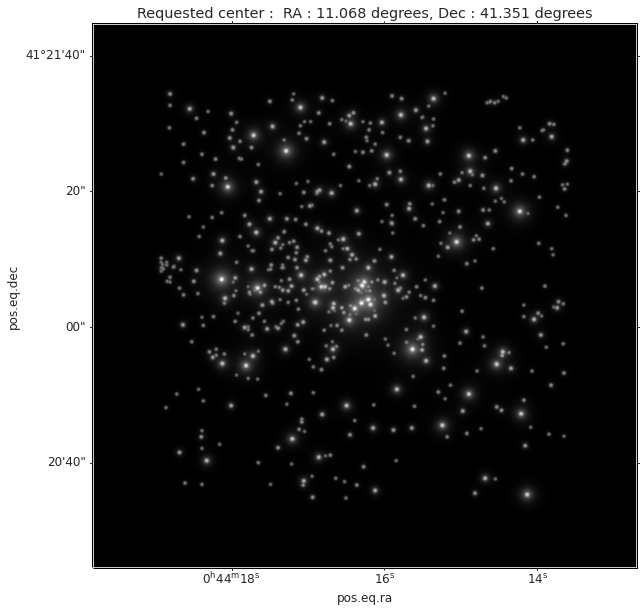

In [262]:
psf.generate_psf()
psf.show_image() # (55, 521)

In [264]:
psf.writeto('off_axis_hcipy.fits')

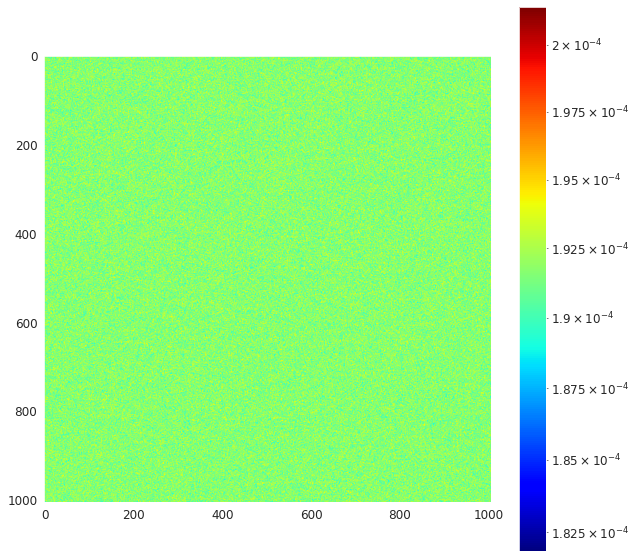

In [ ]:
img = plt.imshow(psf.bag, cmap ='jet', norm = col.LogNorm())
plt.colorbar(img)

## **Analysis**

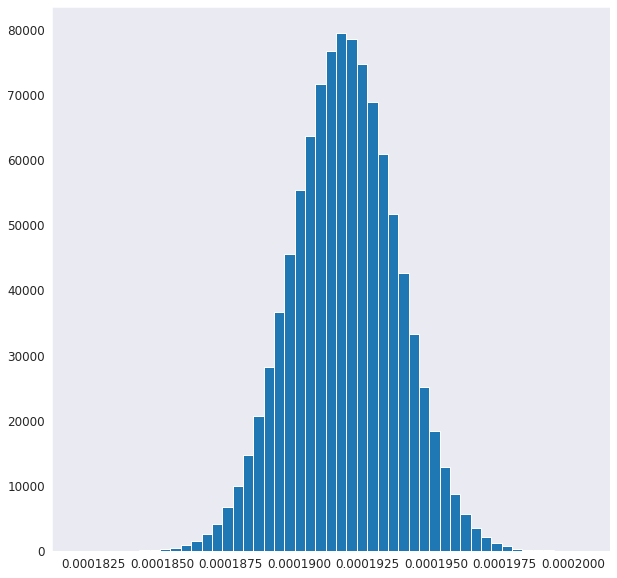

In [ ]:
img = plt.hist(psf.bag.ravel(),bins = np.linspace(psf.bag.min(),psf.bag.max(),50));

In [ ]:
psf.bag.mean() , psf.bag.std()

(0.00019166690411727123, 1.9149226087675698e-06)

In [ ]:
x = (img[1][:-1] + img[1][1:])/2
y = img[0]

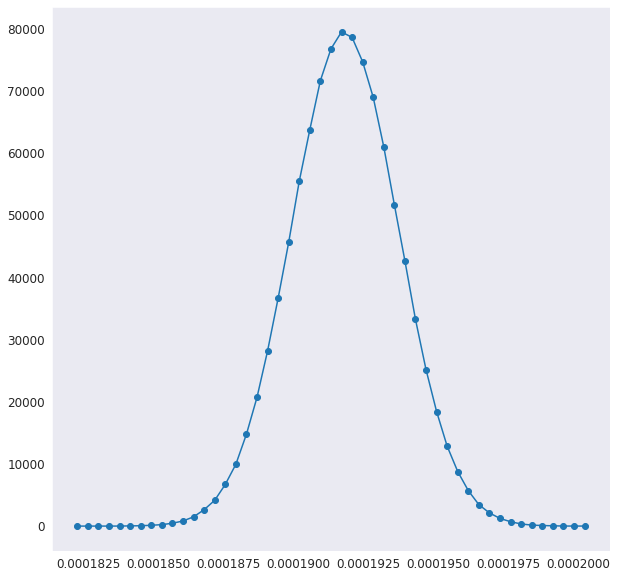

In [ ]:
plt.plot(x,y,'-o')

In [ ]:
psf.sky_bag_flux

0.0001916663888478537

In [ ]:
psf = PSF_gen_v2(df=df,axis='off',mode='hcipy',exp_time = 1)
psf.generate_psf()
psf.writeto('test_off.fits')

c          = SkyCoord(df['ra'],df['dec'],unit=u.deg)
data_b_off = fits.open('test_off.fits')
wcs        = WCS(data_b_off[0].header)
pix        = wcs.world_to_array_index(c)

position        = [(i,j) for i,j in zip(pix[1],pix[0])]

aperture        = CircularAperture(position, r=0.3/0.1)
ap_pix          = np.count_nonzero(aperture.to_mask()[0])
aperture_bag    = aper.CircularAnnulus(position, r_in = 0.3/0.1, r_out = 0.6/0.1)
bag_pix         = np.count_nonzero(aperture_bag.to_mask()[0])

phot_table_off  = aperture_photometry(data_b_off[0].data, [aperture, aperture_bag])

phot_table_off['flux']     = phot_table_off['aperture_sum_0'].value - (ap_pix/bag_pix)*phot_table_off['aperture_sum_1'].value
phot_table_off['sky_flux'] = (ap_pix/bag_pix)*phot_table_off['aperture_sum_1'].value
phot_table_off['flux_err'] = np.sqrt( (phot_table_off['flux'].value + phot_table_off['sky_flux'].value ))

phot_table_off['SNR']      = (phot_table_off['flux'])/( np.sqrt((phot_table_off['flux'] + phot_table_off['sky_flux'] + psf.DC*ap_pix) + psf.RN**2*ap_pix) )

phot_table_off['mag_in']   = df.mag_nuv
phot_table_off['mag_0.3']  = -2.5*np.log10(phot_table_off['flux'].value/(3945554134.834311*psf.exp_time))
phot_table_off['mag_err']  = 1.087*phot_table_off['flux_err'].value/phot_table_off['flux'].value
phot_table_off

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10


<QTable length=539>
  id  xcenter ycenter ...  mag_in      mag_0.3             mag_err      
        pix     pix   ...                                               
int64 float64 float64 ... float32      float64             float64      
----- ------- ------- ... ------- ------------------ -------------------
    1   639.0   106.0 ...  19.441 19.643336627124853  0.1479669735897048
    2   592.0   129.0 ...  24.539  24.74686134729039  1.5745159989106923
    3   577.0   130.0 ...  21.142 21.344466447647832 0.32401843643268774
    4   571.0   203.0 ...  24.612  24.81842266315644  1.6245259337526397
    5   562.0   108.0 ...  22.931 23.134161179695255  0.7403973513048835
    6   553.0   254.0 ...  19.638 19.840347746289744 0.16202410997331057
    7   550.0   196.0 ...  23.764 23.968228146545094  1.0907394086855509
    8   544.0   229.0 ...  22.216  22.41885111962876  0.5320368420211659
    9   526.0   267.0 ...  24.435 24.641268499944516  1.4963755565808488
  ...     ...     ... ...     ...                ...                 ...
  530   348.0   652.0 ...  23.816 24.020485551641787  1.1181388105216512
  531   340.0   625.0 ...  21.953 22.155671152614467  0.4710748171808555
  532   337.0   690.0 ...  22.346  22.54884574820768  0.5648693585883249
  533   332.0   668.0 ...  23.178 23.381554518715472  0.8306830837862822
  534   320.0   655.0 ...  24.692 24.901895798568635   1.696381023700956
  535   311.0   655.0 ...  24.594 24.810377620529263  1.6314970375392415
  536   305.0   649.0 ...  24.338 24.548010926773177  1.4366079650774524
  537   305.0   676.0 ...  20.018  20.22036520728777 0.19302266212834063
  538   295.0   696.0 ...  24.661 24.872119198980037  1.6737778891932173
  539   293.0   687.0 ...  23.996 24.203718434330487  1.2225642340534593

In [ ]:
off = psf.image

In [ ]:
psf.writeto('off_axis_M31.fits')

In [ ]:
psf = PSF_gen_v2(df=df,axis='on',mode='hcipy',exp_time = 1)
psf.generate_psf()
psf.writeto('test_on.fits')
c = SkyCoord(df['ra'],df['dec'],unit=u.deg)
data_b_on  = fits.open('test_on.fits')
wcs        = WCS(data_b_on[0].header)
pix        = wcs.world_to_array_index(c)

position     = [(i,j) for i,j in zip(pix[1],pix[0])]

aperture        = CircularAperture(position, r=0.3/0.1)
ap_pix          = np.count_nonzero(aperture.to_mask()[0])
aperture_bag    = aper.CircularAnnulus(position, r_in = 0.3/0.1, r_out = 0.6/0.1)
bag_pix         = np.count_nonzero(aperture_bag.to_mask()[0])

phot_table_on   = aperture_photometry(data_b_on[0].data, [aperture, aperture_bag])

phot_table_on['sky_flux'] = (ap_pix/bag_pix)*phot_table_on['aperture_sum_1'].value

phot_table_on['flux']     = phot_table_on['aperture_sum_0'].value - phot_table_on['sky_flux'].value

phot_table_on['flux_err'] = np.sqrt( (phot_table_on['flux'].value + phot_table_on['sky_flux'].value ))

phot_table_on['SNR']      = (phot_table_on['flux'].value)/( np.sqrt((phot_table_on['flux'] + phot_table_on['sky_flux'] + psf.DC*ap_pix) + psf.RN**2*ap_pix) )

phot_table_on['mag_in']   = df.mag_nuv
phot_table_on['mag_0.3']  = -2.5*np.log10(phot_table_on['flux'].value/(3639079956.678134*psf.exp_time))
phot_table_on['mag_err']  = 1.087*phot_table_on['flux_err'].value/phot_table_on['flux'].value
phot_table_on

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


<QTable length=539>
  id  xcenter ycenter ...  mag_in      mag_0.3             mag_err      
        pix     pix   ...                                               
int64 float64 float64 ... float32      float64             float64      
----- ------- ------- ... ------- ------------------ -------------------
    1   639.0   106.0 ...  19.441 20.304343612865345 0.21023541900231268
    2   592.0   129.0 ...  24.539  25.39912306389696   2.252234363754174
    3   577.0   130.0 ...  21.142  22.00546806913946 0.46039938005899694
    4   571.0   203.0 ...  24.612 25.482622295940914  2.3179939977430744
    5   562.0   108.0 ...  22.931 23.795202763667383  1.0524100321614773
    6   553.0   254.0 ...  19.638 20.501357164962034 0.23021054279118722
    7   550.0   196.0 ...  23.764 24.630200187740478   1.553282401656188
    8   544.0   229.0 ...  22.216 23.080075593916114  0.7563472225019591
    9   526.0   267.0 ...  24.435 25.303532491566003   2.132714212965709
  ...     ...     ... ...     ...                ...                 ...
  530   348.0   652.0 ...  23.816 24.677731733628427  1.5896717749332718
  531   340.0   625.0 ...  21.953  22.81675925816234  0.6694603348460592
  532   337.0   690.0 ...  22.346  23.21012290158986  0.8029610193415864
  533   332.0   668.0 ...  23.178 24.042986182550955  1.1814348313479321
  534   320.0   655.0 ...  24.692 25.564962633577615   2.429666667195713
  535   311.0   655.0 ...  24.594  25.48055484942445  2.3516736404539955
  536   305.0   649.0 ...  24.338  25.21102706074938   2.058648914480577
  537   305.0   676.0 ...  20.018 20.881377733313368 0.27425768326291317
  538   295.0   696.0 ...  24.661  25.53576709282703   2.397024055793565
  539   293.0   687.0 ...  23.996 24.867966261528768   1.749389544688902

In [ ]:
on = psf.image

In [ ]:
off /= off.max()
on /= on.max()

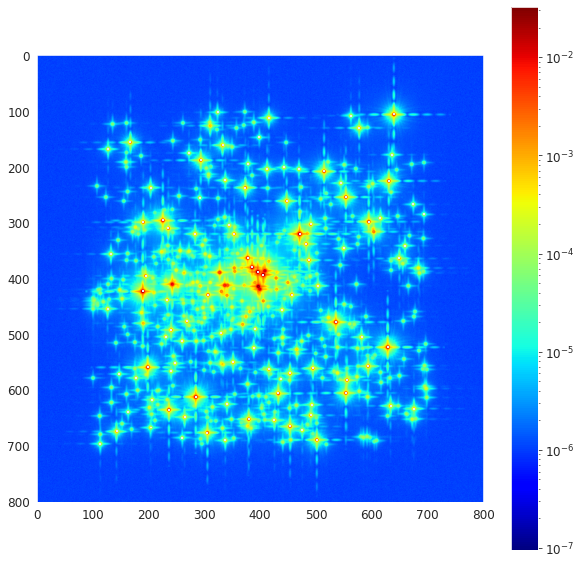

In [ ]:
diff = on-off
img = plt.imshow(psf.image , cmap ='jet', norm = col.LogNorm())
plt.colorbar(img)

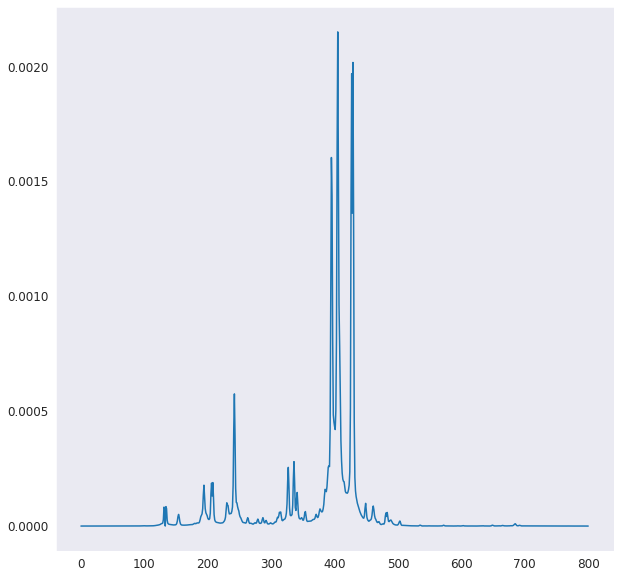

In [ ]:
plt.plot(diff[400])

In [ ]:
psf.image = diff
psf.writeto('diff.fits')

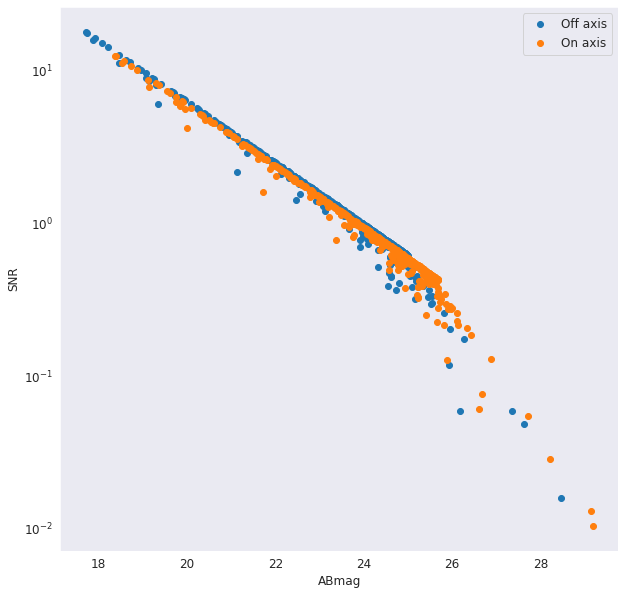

In [ ]:
plt.plot(phot_table_off['mag_0.3'].value,  phot_table_off['SNR'].value, 'o');
plt.plot(phot_table_on['mag_0.3'].value,  phot_table_on['SNR'].value, 'o');
plt.yscale('log')
plt.xlabel('ABmag')
plt.ylabel('SNR')
plt.legend(['Off axis', 'On axis'])

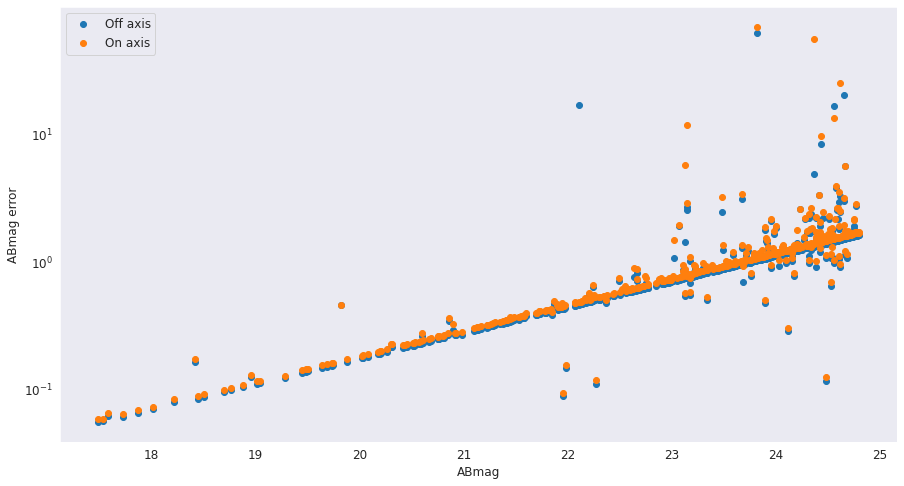

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(phot_table_off['mag_in'].value, phot_table_off['mag_err'].value, 'o')
plt.plot(phot_table_on['mag_in'].value, phot_table_on['mag_err'].value, 'o')

plt.legend(['Off axis', 'On axis'])
plt.xlabel('ABmag')
plt.ylabel('ABmag error')
plt.yscale('log')

In [ ]:
phot_table_on['diff']  = abs(phot_table_on['mag_in'].value  - phot_table_on['mag_0.3'].value)/phot_table_on['mag_in'].value

phot_table_off['diff'] = abs(phot_table_off['mag_in'].value - phot_table_off['mag_0.3'].value)/phot_table_off['mag_in'].value

Text(0, 0.5, '(Input-Output)/Input')

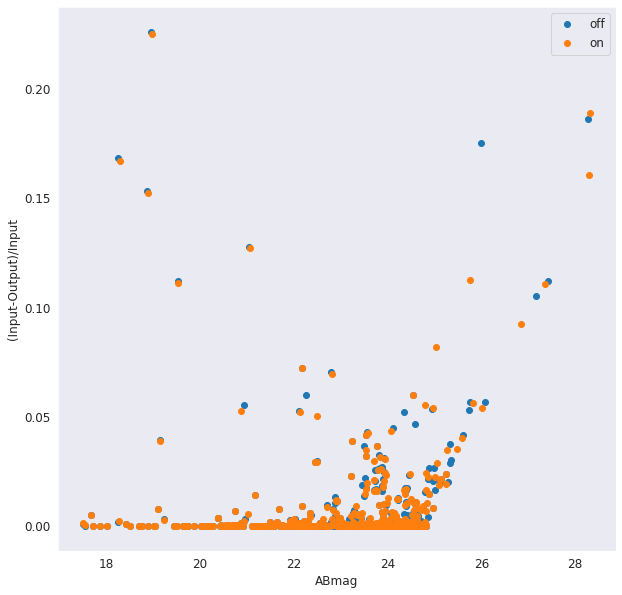

In [ ]:
plt.plot(phot_table_off['mag_0.3'].value, phot_table_off['diff'].value,'o')
plt.plot(phot_table_on['mag_0.3'].value, phot_table_on['diff'].value,'o')
plt.legend(['off', 'on'])
plt.xlabel('ABmag')
plt.ylabel('(Input-Output)/Input')

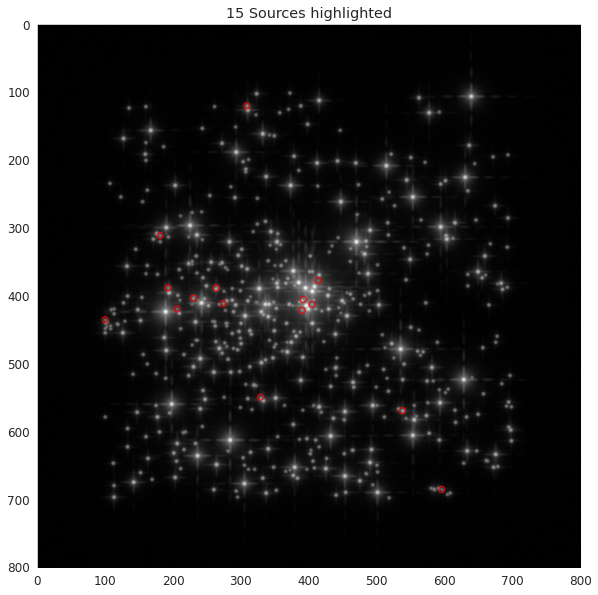

In [ ]:
psf = PSF_gen_v2(df=df,axis='on',mode='hcipy',exp_time=10)
psf.generate_psf()
df_new = phot_table_on.to_pandas()
df_new_on = df_new[ (df_new['diff']>=0.05) & (df_new['SNR']<5) ]
positions = [(i,j) for i,j in zip(df_new_on['xcenter'].values, df_new_on['ycenter'].values)]
apertures     = CircularAperture(positions, r=0.455/0.1)

fig = plt.figure(figsize = (10,10))
ax  = fig.add_subplot(111)
ax.imshow(psf.image, cmap = 'gray', norm = col.LogNorm())
ax.set_title(f'{len(df_new_on)} Sources highlighted')
for aperture in apertures:
  aperture.plot(ax,color= 'red')

In [ ]:
df_new_on

id  xcenter  ycenter  aperture_sum_0  aperture_sum_1   sky_flux  \
52    53    414.0    377.0        4.288465       10.568845   4.099983   
58    59    405.0    412.0       17.909067       44.056778  17.090991   
73    74    392.0    405.0       44.633930       72.634165  28.177047   
75    76    390.0    421.0       15.756169       36.482496  14.152692   
141  142    329.0    549.0       10.495124       25.053610   9.719073   
163  164    309.0    120.0        9.863395       18.960904   7.355523   
210  211    274.0    411.0        6.250256       11.725314   4.548613   
217  218    264.0    388.0       28.299626       13.267569   5.146902   
255  256    230.0    403.0       13.833293        4.107199   1.593310   
279  280    206.0    419.0        3.666946        9.247934   3.587561   
289  290    193.0    388.0        7.632435       14.564840   5.650154   
296  297    181.0    311.0        5.458381       13.871644   5.381241   
346  347    100.0    435.0        3.047927        7.082111   2.747371   
414  415    596.0    685.0        2.503484        4.786477   1.856823   
449  450    538.0    569.0       23.791248        3.675732   1.425931   

          flux  flux_err       SNR     mag_in    mag_0.3    mag_err      diff  
52    0.188482  2.070861  0.091016  24.620001  27.350997  11.942927  0.110926  
58    0.818076  4.231911  0.193311  23.145000  25.757188   5.623057  0.112862  
73   16.456883  6.680863  2.463287  23.691000  22.498303   0.441280  0.050344  
75    1.603477  3.969404  0.403959  23.131001  25.026515   2.690866  0.081947  
141   0.776051  3.239618  0.239550  24.440001  25.814446   4.537674  0.056238  
163   2.507872  3.140604  0.798532  23.146999  24.540908   1.361248  0.060220  
210   1.701643  2.500051  0.680643  23.681999  24.962000   1.597018  0.054050  
217  23.152724  5.319739  4.352229  23.341999  22.127666   0.249757  0.052024  
255  12.239983  3.719314  3.290925  24.530001  22.819719   0.330302  0.069722  
279   0.079385  1.914927  0.041456  24.370001  28.289825  26.220628  0.160846  
289   1.982281  2.762686  0.717520  23.490000  24.796258   1.514941  0.055609  
296   0.077140  2.336318  0.033018  23.820000  28.320974  32.921718  0.188958  
346   0.300557  1.745831  0.172157  24.566999  26.844356   6.314015  0.092700  
414   0.646661  1.582240  0.408700  24.674000  26.012480   2.659654  0.054247  
449  22.365317  4.877627  4.585286  23.896999  22.165234   0.237063  0.072468

In [ ]:
psf.writeto('on_axis_M31.fits')

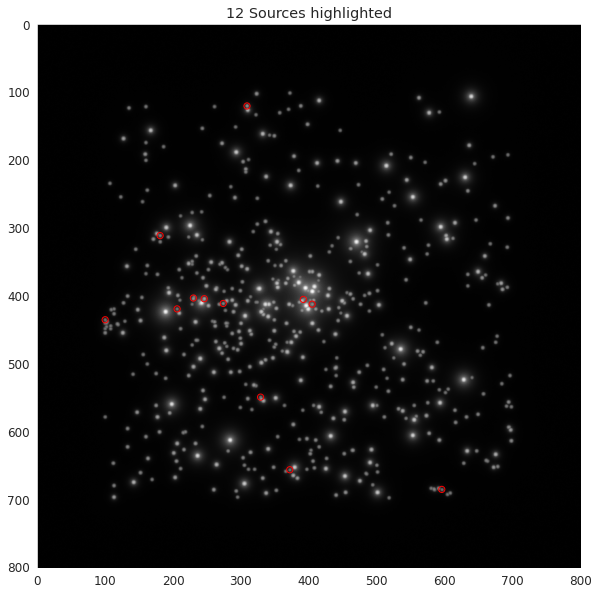

In [ ]:
psf = PSF_gen_v2(df=df,axis='off',mode='hcipy',exp_time =10)
psf.generate_psf()
df_new = phot_table_off.to_pandas()
df_new_off = df_new[ (df_new['diff']>=0.05) & (df_new['SNR']<5) ]
positions = [(i,j) for i,j in zip(df_new_off['xcenter'].values, df_new_off['ycenter'].values)]

apertures     = CircularAperture(positions, r=0.455/0.1)

fig = plt.figure(figsize = (10,10))
ax  = fig.add_subplot(111)
ax.imshow(psf.image, cmap = 'gray', norm = col.LogNorm())
ax.set_title(f'{len(df_new_off)} Sources highlighted')
for aperture in apertures:
  aperture.plot(ax,color= 'red')

In [ ]:
psf.writeto('off_axis_M31.fits')

In [ ]:
df_new_on

id  xcenter  ycenter  aperture_sum_0  aperture_sum_1   sky_flux  \
27    28    462.0    330.0        0.775563        0.403903   0.156686   
28    29    461.0    330.0        0.762756        0.342707   0.132947   
68    69    397.0    412.0      107.454203       70.986394  27.537825   
73    74    392.0    405.0        4.463391        7.263410   2.817702   
95    96    369.0    483.0        6.647039        1.079723   0.418858   
143  144    325.0    389.0       28.731701        9.208534   3.572276   
146  147    324.0    409.0        0.609249        0.516800   0.200483   
148  149    322.0    409.0        0.578031        0.399568   0.155005   
150  151    322.0    532.0        0.954667        1.075412   0.417186   
199  200    280.0    440.0        0.710521        0.517565   0.200779   
203  204    278.0    440.0        0.797678        0.433318   0.168098   
204  205    278.0    440.0        0.797678        0.433318   0.168098   
217  218    264.0    388.0        2.829981        1.326764   0.514693   
226  227    258.0    437.0        0.463171        0.462402   0.179380   
241  242    242.0    408.0       52.986471       26.958707  10.458119   
242  243    240.0    411.0       55.065431       23.342548   9.055299   
246  247    236.0    465.0        0.545566        0.162793   0.063152   
251  252    234.0    465.0        0.586867        0.121972   0.047317   
254  255    231.0    401.0        0.805227        0.932134   0.361604   
255  256    230.0    403.0        1.383322        0.410740   0.159339   
256  257    230.0    404.0        1.340837        0.531192   0.206066   
335  336    119.0    442.0        0.657332        0.114593   0.044454   
336  337    118.0    441.0        0.667908        0.103647   0.040208   
344  345    102.0    440.0        0.747668        0.650909   0.252508   
381  382    663.0    643.0        0.540695        0.170571   0.066170   
382  383    661.0    642.0        0.563651        0.145427   0.056416   
422  423    585.0    685.0        0.667456        0.548778   0.212888   
423  424    584.0    684.0        0.694715        0.459967   0.178436   
449  450    538.0    569.0        2.379120        0.367575   0.142594   
478  479    485.0    662.0        0.475133        0.093035   0.036091   
479  480    484.0    661.0        0.472292        0.093100   0.036117   
486  487    465.0    627.0        0.870123        0.107780   0.041811   
487  488    464.0    627.0        0.881078        0.097649   0.037881   
496  497    440.0    505.0        1.749394        0.257222   0.099785   
499  500    439.0    506.0        1.794689        0.213510   0.082827   

          flux   flux_err       SNR     mag_in    mag_0.3   mag_err      diff  
27    0.618877   0.880661  0.702741  24.035000  23.560161  1.546799  0.019756  
28    0.629809   0.873359  0.721134  24.393999  23.541150  1.507348  0.034961  
68   79.916378  10.366012  7.709462  21.952999  18.282582  0.140996  0.167194  
73    1.645689   2.112674  0.778960  23.691000  22.498302  1.395450  0.050344  
95    6.228181   2.578185  2.415723  24.122000  21.053268  0.449969  0.127217  
143  25.159425   5.360196  4.693751  21.988001  19.537420  0.231585  0.111451  
146   0.408766   0.780544  0.523694  24.323000  24.010483  2.075639  0.012849  
148   0.423026   0.760283  0.556405  24.544001  23.973254  1.953611  0.023254  
150   0.537481   0.977070  0.550094  24.219999  23.713263  1.976024  0.020922  
199   0.509742   0.842924  0.604730  24.672001  23.770796  1.797496  0.036527  
203   0.629581   0.893128  0.704916  24.566999  23.541543  1.542027  0.041741  
204   0.629581   0.893128  0.704916  24.320999  23.541543  1.542027  0.032049  
217   2.315288   1.682255  1.376300  23.341999  22.127659  0.789799  0.052024  
226   0.283791   0.680567  0.416992  24.666000  24.406674  2.606763  0.010514  
241  42.528352   7.279181  5.842464  24.483999  18.967475  0.186052  0.225311  
242  46.010132   7.420609  6.200318  22.277000  18.882038  0.175314  0.152398  
246   0.482414   

In [ ]:
df_new_off

id  xcenter  ycenter  aperture_sum_0  aperture_sum_1        flux  \
27    28    462.0    330.0        1.454172        0.418089    1.291982   
28    29    461.0    330.0        1.440937        0.366279    1.298846   
68    69    397.0    412.0      212.269784      125.968253  163.402789   
73    74    392.0    405.0        8.190449       10.652359    4.058068   
95    96    369.0    483.0       13.170882        1.547948   12.570385   
143  144    325.0    389.0       57.029777       15.439266   51.040407   
146  147    324.0    409.0        1.071571        0.379965    0.924171   
148  149    322.0    409.0        1.050264        0.329709    0.922359   
150  151    322.0    532.0        1.851035        2.038646    1.060181   
199  200    280.0    440.0        1.389064        0.943237    1.023153   
203  204    278.0    440.0        1.555732        0.779441    1.253363   
204  205    278.0    440.0        1.555732        0.779441    1.253363   
217  218    264.0    388.0        5.585989        2.326342    4.683528   
226  227    258.0    437.0        0.893712        0.830657    0.571475   
241  242    242.0    408.0      105.073947       47.948718   86.473152   
242  243    240.0    411.0      109.364888       40.573497   93.625169   
246  247    236.0    465.0        1.075835        0.257876    0.975797   
251  252    234.0    465.0        1.154572        0.181447    1.084183   
254  255    231.0    401.0        1.530532        1.622839    0.900982   
255  256    230.0    403.0        2.690957        0.503681    2.495564   
256  257    230.0    404.0        2.584200        0.640628    2.335680   
335  336    119.0    442.0        1.294694        0.154604    1.234718   
336  337    118.0    441.0        1.313008        0.135737    1.260351   
344  345    102.0    440.0        1.462671        1.191748    1.000355   
381  382    663.0    643.0        1.065801        0.281911    0.956440   
382  383    661.0    642.0        1.110213        0.235358    1.018911   
422  423    585.0    685.0        1.304052        1.008306    0.912899   
423  424    584.0    684.0        1.354785        0.829977    1.032811   
449  450    538.0    569.0        4.671955        0.529614    4.466501   
478  479    485.0    662.0        0.932513        0.115710    0.887626   
479  480    484.0    661.0        0.928037        0.120696    0.881215   
486  487    465.0    627.0        1.714958        0.142595    1.659641   
487  488    464.0    627.0        1.734082        0.124027    1.685968   
496  497    440.0    505.0        3.454753        0.366248    3.312674   
499  500    439.0    506.0        3.539848        0.282554    3.430237   

      sky_flux   flux_err        SNR     mag_in    mag_0.3   mag_err      diff  
27    0.162190   1.205890   1.071392  24.035000  23.509824  1.014567  0.021850  
28    0.142091   1.200390   1.082020  24.393999  23.504071  1.004603  0.036481  
68   48.866995  14.569481  11.215416  21.952999  18.254817  0.096920  0.168459  
73    4.132381   2.861896   1.417965  23.691000  22.267167  0.766592  0.060100  
95    0.600497   3.629171   3.463707  24.122000  21.039594  0.313826  0.127784  
143   5.989370   7.551806   6.758702  21.988001  19.518180  0.160830  0.112326  
146   0.147400   1.035167   0.892774  24.323000  23.873585  1.217553  0.018477  
148   0.127905   1.024824   0.900017  24.544001  23.875715  1.207755  0.027228  
150   0.790854   1.360528   0.779243  24.219999  23.724515  1.394944  0.020458  
199   0.365911   1.178586   0.868120  24.672001  23.763113  1.252132  0.036839  
203   0.302369   1.247290   1.004869  24.566999  23.542773  1.081733  0.041691  
204   0.302369   1.247290   1.004869  24.320999  23.542773  1.081733  0.031998  
217   0.902460   2.363470   1.981633  23.341999  22.111532  0.548538  0.052715  
226   0.322238   0.945363   0.604502  24.666000  24.395473  1.798173  0.010968  
241  18.600796  10.250558   8.435945  24.483999  18.945762  0.128853  0.226198  
242  15.739719  10.457767   8.952692  22.2770